## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('New Dataset.xlsx')

In [5]:
df.sample(10)

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
5319,SB11201320035458,F,Incomplete primary,Complete primary,Small entrepreneur,Home,Stratum 3,It is not classified by the SISBEN,Seven,NaN,...,53,48,91,177,151,59,3,3,2,2
3333,SB11201220425325,F,0,Incomplete primary,0,0,Stratum 2,It is not classified by the SISBEN,Four,NaN,...,48,52,15,141,138,37,2,2,3,2
3675,SB11201220485189,M,0,0,0,0,Stratum 1,Level 1,Ten,NaN,...,16,52,75,167,155,65,4,3,1,2
4106,SB11201220565928,M,0,0,0,0,Stratum 1,Level 1,Five,NaN,...,49,39,68,116,164,77,4,4,2,2
406,SB11201220020776,F,0,0,0,Home,Stratum 1,Level 1,Four,NaN,...,20,63,12,20,146,50,3,3,3,2
4969,SB11201320016862,F,Incomplete Secundary,Complete technique or technology,Independent,Auxiliary or Administrative,Stratum 3,It is not classified by the SISBEN,Four,NaN,...,96,82,54,182,183,93,5,4,3,2
4098,SB11201220563991,M,Incomplete Professional Education,Incomplete Professional Education,Executive,Entrepreneur,Stratum 3,It is not classified by the SISBEN,Three,NaN,...,85,22,11,158,160,71,4,3,4,1
3567,SB11201220467636,M,Incomplete Secundary,Incomplete Professional Education,Home,Executive,Stratum 2,Level 2,Five,NaN,...,56,67,93,153,155,64,4,3,2,2
11431,SB11201410030679,M,Complete Secundary,Postgraduate education,Independent,Technical or professional level employee,Stratum 6,It is not classified by the SISBEN,Four,NaN,...,36,96,16,170,164,77,4,4,2,4
1607,SB11201220231835,M,Incomplete Secundary,Complete Secundary,Other occupation,Home,Stratum 2,Level 2,Four,NaN,...,96,78,18,196,171,84,5,4,1,2


In [6]:
df.isnull().sum()

COD_S11                 0
GENDER                  0
EDU_FATHER              0
EDU_MOTHER              0
OCC_FATHER              0
OCC_MOTHER              0
STRATUM                 0
SISBEN                  0
PEOPLE_HOUSE            0
Unnamed: 9          12411
INTERNET                0
TV                      0
COMPUTER                0
WASHING_MCH             0
MIC_OVEN                0
CAR                     0
DVD                     0
FRESH                   0
PHONE                   0
MOBILE                  0
REVENUE                 0
JOB                     0
SCHOOL_NAME             0
SCHOOL_NAT              0
SCHOOL_TYPE             0
MAT_S11                 0
CR_S11                  0
CC_S11                  0
BIO_S11                 0
ENG_S11                 0
Cod_SPro                0
UNIVERSITY              0
ACADEMIC_PROGRAM        0
QR_PRO                  0
CR_PRO                  0
CC_PRO                  0
ENG_PRO                 0
WC_PRO                  0
FEP_PRO     

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop(columns=['Unnamed: 9'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_S11           12411 non-null  object
 1   GENDER            12411 non-null  object
 2   EDU_FATHER        12411 non-null  object
 3   EDU_MOTHER        12411 non-null  object
 4   OCC_FATHER        12411 non-null  object
 5   OCC_MOTHER        12411 non-null  object
 6   STRATUM           12411 non-null  object
 7   SISBEN            12411 non-null  object
 8   PEOPLE_HOUSE      12411 non-null  object
 9   INTERNET          12411 non-null  object
 10  TV                12411 non-null  object
 11  COMPUTER          12411 non-null  object
 12  WASHING_MCH       12411 non-null  object
 13  MIC_OVEN          12411 non-null  object
 14  CAR               12411 non-null  object
 15  DVD               12411 non-null  object
 16  FRESH             12411 non-null  object
 17  PHONE       

In [10]:
missing_saber_pro = df[df['Cod_SPro'].isna() | (df['Cod_SPro'] == '') | (df['Cod_SPro'] == 0)]

print(f"Number of records with missing SABER PRO IDs: {len(missing_saber_pro)}")
print("\nSample of records with missing SABER PRO IDs:")
print(missing_saber_pro.head())

saber11_duplicates = df[df.duplicated(subset=['COD_S11'], keep=False)]
print(f"\nNumber of records with duplicate SABER 11 IDs: {len(saber11_duplicates)}")
if len(saber11_duplicates) > 0:
    print("\nSample of duplicate SABER 11 ID records:")
    print(saber11_duplicates.sort_values('COD_S11').head())

saberpro_duplicates = df[df.duplicated(subset=['Cod_SPro'], keep=False)]
print(f"\nNumber of records with duplicate SABER PRO IDs: {len(saberpro_duplicates)}")
if len(saberpro_duplicates) > 0:
    print("\nSample of duplicate SABER PRO ID records:")
    print(saberpro_duplicates.sort_values('Cod_SPro').head())

def keep_most_recent_record():
    duplicate_mask = df.duplicated(subset=['Cod_SPro'], keep=False)
    duplicates = df[duplicate_mask].copy()
    non_duplicates = df[~duplicate_mask].copy()
    duplicates['S11_Year'] = duplicates['COD_S11'].str[4:8].astype(int)
    
    keep_rows = []
    for saber_pro_id, group in duplicates.groupby('Cod_SPro'):
        most_recent = group.loc[group['S11_Year'].idxmax()]
        keep_rows.append(most_recent)
    
    filtered_df = pd.concat([non_duplicates, pd.DataFrame(keep_rows)])
    
    if 'S11_Year' in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=['S11_Year'])
    
    return filtered_df
df = keep_most_recent_record()
print(f"Filtered DataFrame shape: {df.shape}")

Number of records with missing SABER PRO IDs: 0

Sample of records with missing SABER PRO IDs:
Empty DataFrame
Columns: [COD_S11, GENDER, EDU_FATHER, EDU_MOTHER, OCC_FATHER, OCC_MOTHER, STRATUM, SISBEN, PEOPLE_HOUSE, INTERNET, TV, COMPUTER, WASHING_MCH, MIC_OVEN, CAR, DVD, FRESH, PHONE, MOBILE, REVENUE, JOB, SCHOOL_NAME, SCHOOL_NAT, SCHOOL_TYPE, MAT_S11, CR_S11, CC_S11, BIO_S11, ENG_S11, Cod_SPro, UNIVERSITY, ACADEMIC_PROGRAM, QR_PRO, CR_PRO, CC_PRO, ENG_PRO, WC_PRO, FEP_PRO, G_SC, PERCENTILE, 2ND_DECILE, QUARTILE, SEL, SEL_IHE]
Index: []

[0 rows x 44 columns]

Number of records with duplicate SABER 11 IDs: 0

Number of records with duplicate SABER PRO IDs: 32

Sample of duplicate SABER PRO ID records:
               COD_S11 GENDER                             EDU_FATHER  \
6524  SB11201320110284      M  Incomplete technical or technological   
2259  SB11201220313289      M                                      0   
8035  SB11201320225581      F      Incomplete Professional Education   

In [11]:
df.rename(columns={'MAT_S11': 'Math_S11',
                   'CR_S11': 'Critical Reading_S11', 
                   'CC_S11': 'Citizen Competencies_S11',
                   'BIO_S11': 'Biology_S11', 
                   'ENG_S11': 'English_S11',
                   'QR_PRO': 'Quantitative Reasoning_PRO',
                   'CR_PRO': 'Critical Reading_PRO',
                   'CC_PRO': 'Citizen Competencies_PRO',
                   'ENG_PRO': 'English_PRO',
                   'WC_PRO': 'Written Communication_PRO',
                   'FEP_PRO': 'Formulation of Engineering Projects_PRO',
                   'SEL': 'Socioeconomic Level',
                   'SEL_IHE': 'Socioeconomic Level of The Institution of Higher Education'}, inplace=True)

In [12]:
df.describe()

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,Socioeconomic Level,Socioeconomic Level of The Institution of Higher Education
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,64.326261,60.782896,60.709238,63.958935,61.804599,77.419766,62.214603,59.200726,67.504316,53.723921,145.495200,162.724002,68.461880,3.886325,3.189351,2.598790,2.409359
std,11.876539,10.026175,10.121873,11.155950,14.300620,22.678590,27.657494,28.989655,25.488274,29.993318,40.131322,23.109625,25.862181,1.248166,0.978822,1.111929,0.926930
min,26.000000,24.000000,0.000000,11.000000,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,56.000000,54.000000,54.000000,56.000000,50.000000,65.000000,42.000000,36.000000,51.000000,28.000000,124.000000,147.000000,51.000000,3.000000,3.000000,2.000000,2.000000
50%,64.000000,61.000000,60.000000,64.000000,59.000000,85.000000,67.000000,65.000000,74.000000,56.000000,153.000000,163.000000,75.000000,4.000000,4.000000,2.000000,2.000000
75%,72.000000,67.000000,67.000000,71.000000,72.000000,96.000000,86.000000,85.000000,88.000000,80.000000,174.000000,179.000000,90.000000,5.000000,4.000000,4.000000,3.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,247.000000,100.000000,5.000000,4.000000,4.000000,4.000000


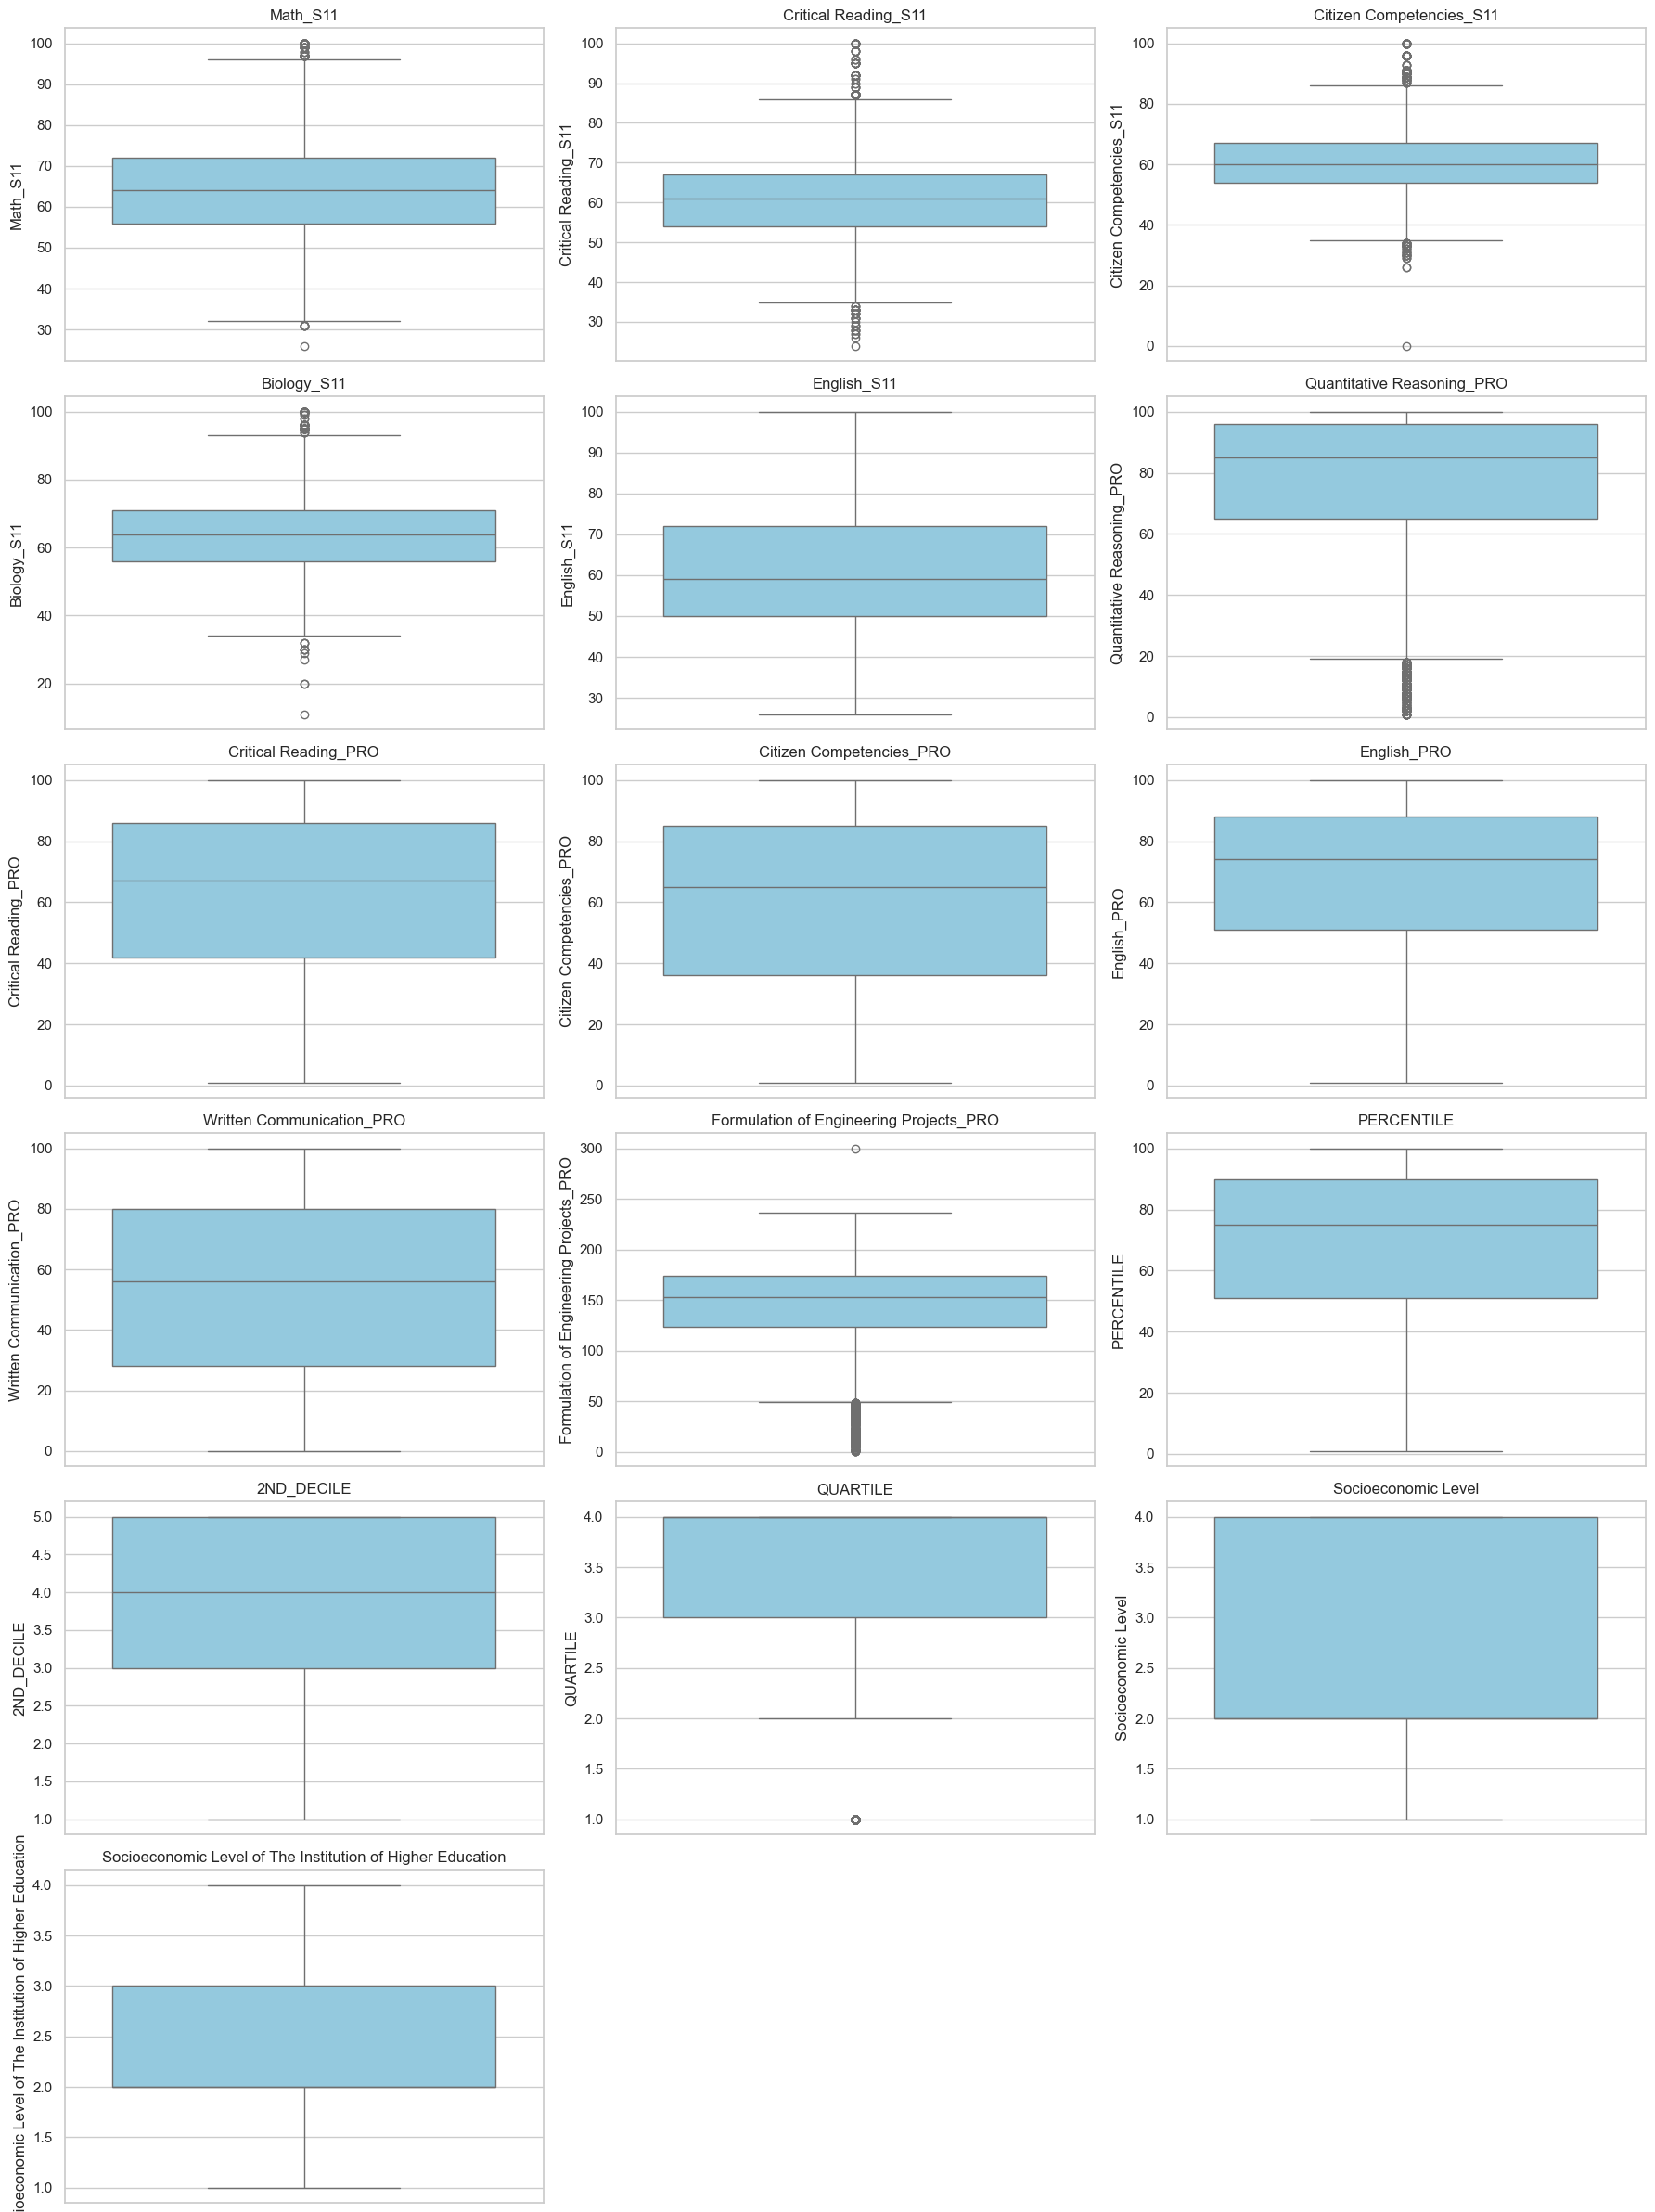

In [13]:
numeric_columns = [
    "Math_S11", "Critical Reading_S11", "Citizen Competencies_S11", "Biology_S11", "English_S11",
    "Quantitative Reasoning_PRO", "Critical Reading_PRO", "Citizen Competencies_PRO", "English_PRO",
    "Written Communication_PRO", "Formulation of Engineering Projects_PRO", "PERCENTILE",
    "2ND_DECILE", "QUARTILE", "Socioeconomic Level",
    "Socioeconomic Level of The Institution of Higher Education"
]

sns.set(style="whitegrid")

def plot_boxplots(df, numeric_columns):
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # Adjust rows based on number of plots

    plt.figure(figsize=(18, num_rows * 4))

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(data=df, y=col, color="skyblue")
        plt.title(col)
        plt.tight_layout()

    plt.show()

plot_boxplots(df, numeric_columns)


In [14]:
from functools import reduce

def get_unique_value_counts_df(df, columns):
    value_counts_dfs = []
    
    for col in columns:
        counts_df = (
            df[col]
            .value_counts(dropna=True)
            .reset_index()
            .rename(columns={'index': f'{col}', col: f'{col}_COUNT'})
        )
        value_counts_dfs.append(counts_df)
   
    merged_df = pd.concat(value_counts_dfs, axis=1)

    return merged_df


In [15]:
columns_to_check = ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER']
nan_counts = df[columns_to_check].isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
EDU_FATHER    0
EDU_MOTHER    0
OCC_FATHER    0
OCC_MOTHER    0
dtype: int64


In [16]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])


,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015,Complete Secundary,3106,Independent,2907,Home,4650
1,Complete Secundary,2842,Complete professional education,3059,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193,Complete technique or technology,1493,Operator,1537,Independent,1107
3,Incomplete Secundary,1091,Incomplete Secundary,1056,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084,Postgraduate education,995,Executive,1076,Executive,793
5,Complete primary,823,Complete primary,712,0,928,Independent professional,715
6,Incomplete primary,731,Incomplete primary,538,Independent professional,914,Operator,684
7,Incomplete Professional Education,425,Incomplete Professional Education,502,Small entrepreneur,692,Other occupation,607
8,Not sure,407,0,380,Retired,532,Small entrepreneur,492
9,0,384,Incomplete technical or technological,341,Entrepreneur,471,0,306


In [17]:
df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)

df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)

df['OCC_FATHER'] = df['OCC_FATHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)
df['OCC_MOTHER'] = df['OCC_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)


In [18]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])

,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015.0,Complete Secundary,3106.0,Independent,2907,Home,4650
1,Complete Secundary,2842.0,Complete professional education,3059.0,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193.0,Complete technique or technology,1493.0,Operator,1537,Independent,1107
3,Incomplete Secundary,1091.0,Incomplete Secundary,1056.0,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084.0,Postgraduate education,995.0,Executive,1076,Executive,793
5,Complete primary,823.0,Complete primary,712.0,Unknown,928,Independent professional,715
6,Unknown,791.0,Unknown,559.0,Independent professional,914,Operator,684
7,Incomplete primary,731.0,Incomplete primary,538.0,Small entrepreneur,692,Other occupation,607
8,Incomplete Professional Education,425.0,Incomplete Professional Education,502.0,Retired,532,Small entrepreneur,492
9,Incomplete technical or technological,277.0,Incomplete technical or technological,341.0,Entrepreneur,471,Unknown,306


In [19]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,It is not classified by the SISBEN,7521.0,Stratum 3,4038
1,Level 2,2118.0,Stratum 2,4026
2,Level 1,2056.0,Stratum 1,1707
3,Level 3,583.0,Stratum 4,1575
4,Esta clasificada en otro Level del SISBEN,96.0,Stratum 5,632
5,0,21.0,Stratum 6,403
6,NaN,NaN,0,14


In [20]:
def handle_sisben(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str):
        x = x.strip().lower()
        if x == '0' or 'it is not classified by the sisben' in x or 'esta clasificada en otro level del sisben' in x:
            return 'Unknown'
    return x

def handle_stratum(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str) and x.strip() == '0':
        return 'Unknown'
    return x

df['SISBEN'] = df['SISBEN'].apply(handle_sisben)
df['STRATUM'] = df['STRATUM'].apply(handle_stratum)

In [21]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,Unknown,7638.0,Stratum 3,4038
1,level 2,2118.0,Stratum 2,4026
2,level 1,2056.0,Stratum 1,1707
3,level 3,583.0,Stratum 4,1575
4,NaN,NaN,Stratum 5,632
5,NaN,NaN,Stratum 6,403
6,NaN,NaN,Unknown,14


In [22]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,0,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,0,276.0,NaN,NaN,NaN,NaN,Nueve,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,Twelve or more,32


In [23]:
df['JOB'] = df['JOB'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )
df['REVENUE'] = df['REVENUE'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )

df = df[df['PEOPLE_HOUSE'] != '0']

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Nueve': 'Nine'})

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Once': 'eleven'})

In [24]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,Unknown,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,Unknown,276.0,NaN,NaN,NaN,NaN,Nine,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,Twelve or more,32


In [25]:
import re

# Extract name and city using regex
df[['University', 'City']] = df['UNIVERSITY'].str.extract(r'^(.*?)(?:\s*[-–]{1,2}\s*|\s+)([A-ZÁÉÍÓÚÑ\s\.]+)$')

# Optional: Clean spaces
df['University'] = df['University'].str.strip()
df['City'] = df['City'].str.strip()

df


,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,...,Written Communication_PRO,Formulation of Engineering Projects_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,Socioeconomic Level,Socioeconomic Level of The Institution of Higher Education,University,City
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,Unknown,Three,Yes,...,79,181,180,91,5,4,2,2,UNIVERSIDAD DE SANTANDER - UDES,BUCARAMANGA
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,Unknown,Three,Yes,...,78,201,182,92,5,4,4,4,UNIVERSIDAD DE LOS ANDES,BOGOTÁ D.C.
2,SB11201210005154,M,Unknown,Unknown,Independent,Home,Stratum 2,level 2,Five,No,...,22,113,113,7,1,1,1,1,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD,BOGOTÁ D.C.
3,SB11201210007504,F,Unknown,Unknown,Other occupation,Independent,Stratum 2,Unknown,Three,Yes,...,48,137,157,67,4,3,2,2,UNIVERSIDAD CATOLICA DE PEREIRA,PEREIRA
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,Unknown,One,Yes,...,71,189,198,98,5,4,4,2,UNIVERSIDAD INDUSTRIAL DE SANTANDER,BUCARAMANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,SB11201310056691,M,Complete Secundary,Complete technique or technology,Unknown,Home,Stratum 1,level 2,Five,Yes,...,9,137,111,6,1,1,1,2,FUNDACION UNIVERSITARIA INTERNACIONAL DEL TROP...,YOPAL
4424,SB11201310012059,F,Complete technique or technology,Complete technique or technology,Unknown,Home,Stratum 3,Unknown,Four,Yes,...,15,156,154,62,4,3,2,2,UNIVERSIDAD DE SAN BUENAVENTURA,CALI
4636,SB11201310057554,F,Complete professional education,Incomplete Professional Education,Unknown,Home,Stratum 5,Unknown,Five,Yes,...,12,110,128,22,2,1,3,2,CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA,NEIVA
11438,SB11201410032085,F,Complete Secundary,Complete Secundary,Small entrepreneur,Small entrepreneur,Stratum 2,level 2,Three,Yes,...,15,147,146,50,3,3,2,2,CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA,NEIVA


In [26]:
df.drop(columns=['UNIVERSITY'], inplace=True)

In [27]:
university_by_city = df.groupby('University')['City'].first().reset_index()
print("Universities by City:")
print(university_by_city.sort_values('City'))

Universities by City:
                                            University           City
16   CORPORACION UNIVERSITARIA EMPRESARIAL ALEXANDE...        ARMENIA
21   ESCUELA DE ADMINISTRACION Y MERCADOTECNIA DEL ...        ARMENIA
84                             UNIVERSIDAD DEL QUINDIO        ARMENIA
57                     UNIVERSIDAD AUTONOMA DEL CARIBE   BARRANQUILLA
80                           UNIVERSIDAD DEL ATLANTICO   BARRANQUILLA
..                                                 ...            ...
64                   UNIVERSIDAD DE BOYACA - UNIBOYACA          TUNJA
106                      UNIVERSIDAD POPULAR DEL CESAR     VALLEDUPAR
15                  CORPORACION UNIVERSITARIA DEL META  VILLAVICENCIO
73                           UNIVERSIDAD DE LOS LLANOS  VILLAVICENCIO
35   FUNDACION UNIVERSITARIA INTERNACIONAL DEL TROP...          YOPAL

[116 rows x 2 columns]


### Visualization

In [28]:
df_visualize = df.copy()

In [29]:
color_palette = ['#0d1321', '#1d2d44', '#3e5c76', '#748cab', '#f0ebd8']

##### Histograms: S11 vs. PRO Scores

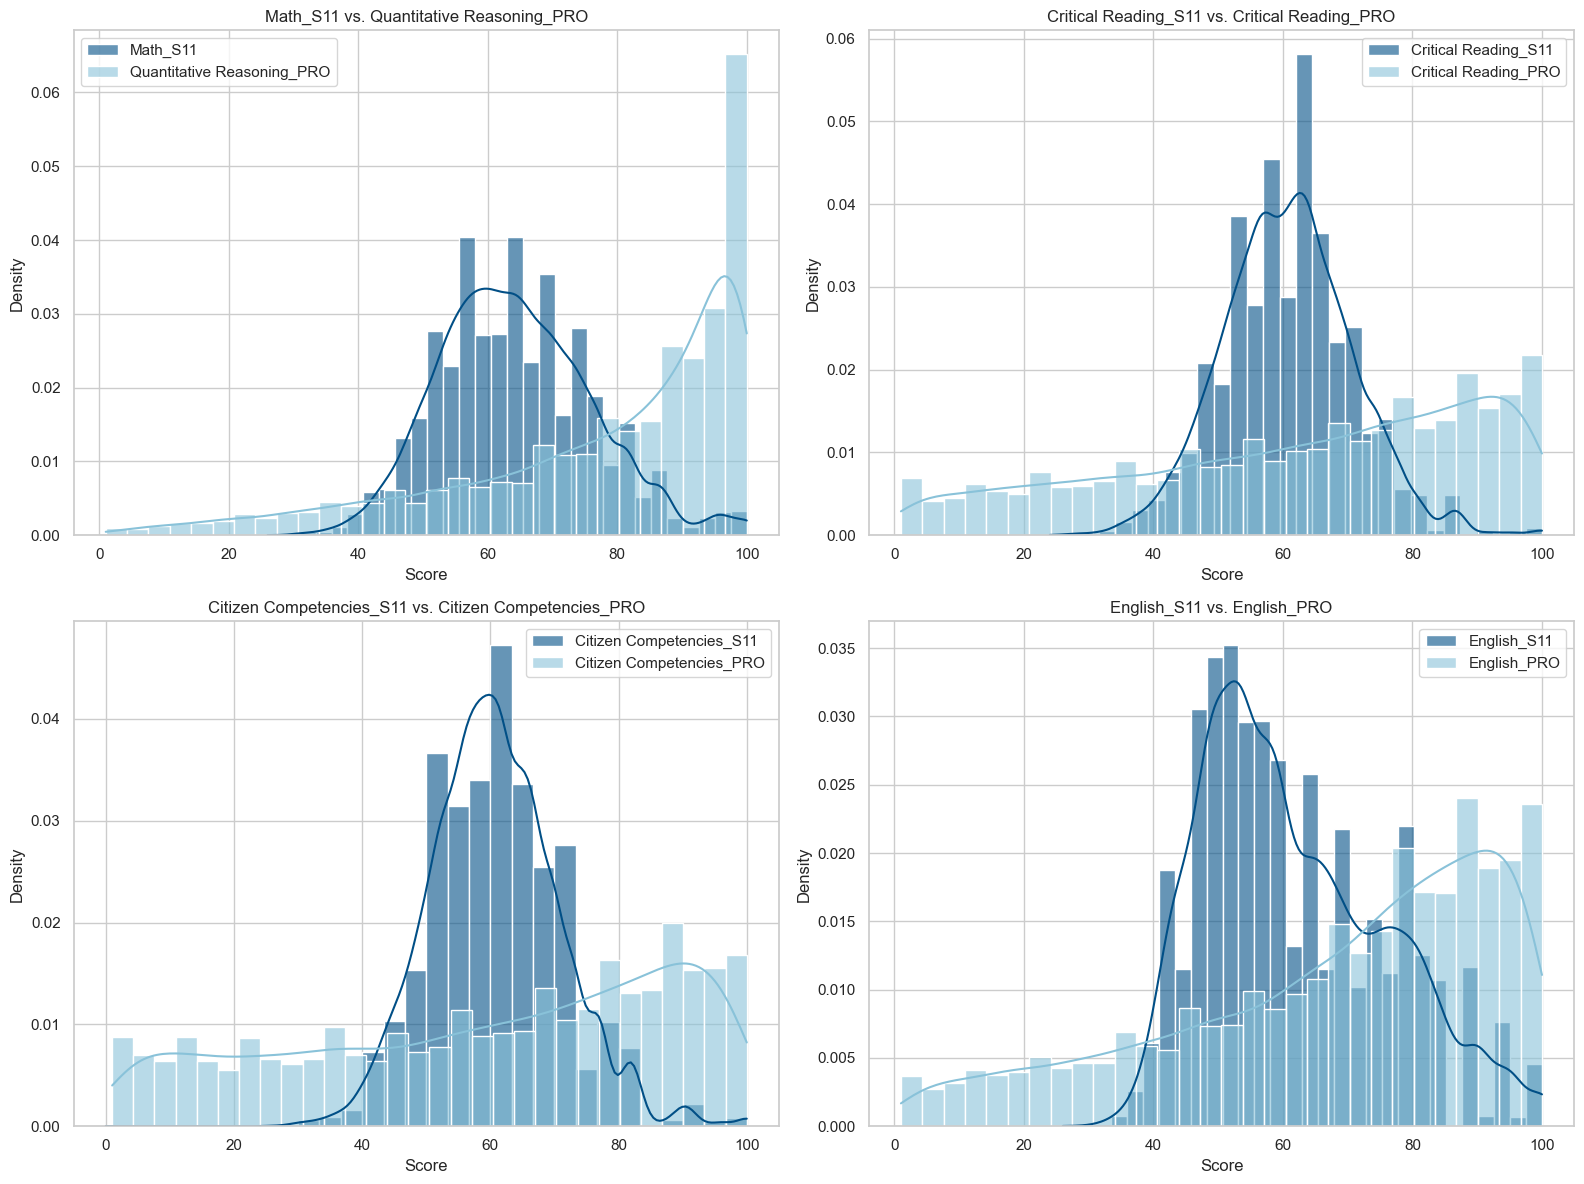

In [30]:
score_pairs = [
    ('Math_S11', 'Quantitative Reasoning_PRO'),
    ('Critical Reading_S11', 'Critical Reading_PRO'),
    ('Citizen Competencies_S11', 'Citizen Competencies_PRO'),
    ('English_S11', 'English_PRO')
]

plt.figure(figsize=(16, 12))

for i, (s11_col, pro_col) in enumerate(score_pairs):
    plt.subplot(2, 2, i + 1)
    

    sns.histplot(df[s11_col], color= '#014f86', kde=True, label=s11_col, stat="density", bins=30, alpha=0.6)
   
    sns.histplot(df[pro_col], color='#89c2d9', kde=True, label=pro_col, stat="density", bins=30, alpha=0.6)
    
    plt.title(f'{s11_col} vs. {pro_col}')
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


##### 1. Overall Performance in PRO vs. S11:
- **General Trend**: Across all subjects, **PRO scores** tend to outperform **S11 scores**, with higher concentrations of scores towards the upper end (close to 100).
- **Conclusion**: This indicates better achievement in PRO assessments compared to S11 assessments.
##### 2. S11 Scores Distribution:
- **Normal Distribution**: S11 scores are generally more normally distributed.
- **Performance Range**: The scores peak around the mid-range (50-70), suggesting **average performance levels**.
##### 3. PRO Scores Variability:
- **Skew Towards Excellence**: PRO scores show a higher skew towards **excellent performance**.
- **Bimodal Trends**: Some subjects (e.g., Citizen Competencies) display **bimodal distributions**, indicating variability in student performance.
##### 4. Subject-Specific Trends:
- **Math and Critical Reading**: Both subjects show a **clear and consistent gap** between S11 and PRO scores, with PRO scores being higher.
- **Citizen Competencies and English**: These subjects display **more variability**, particularly in PRO scores.

##### Bar Charts of Average Scores by Gender

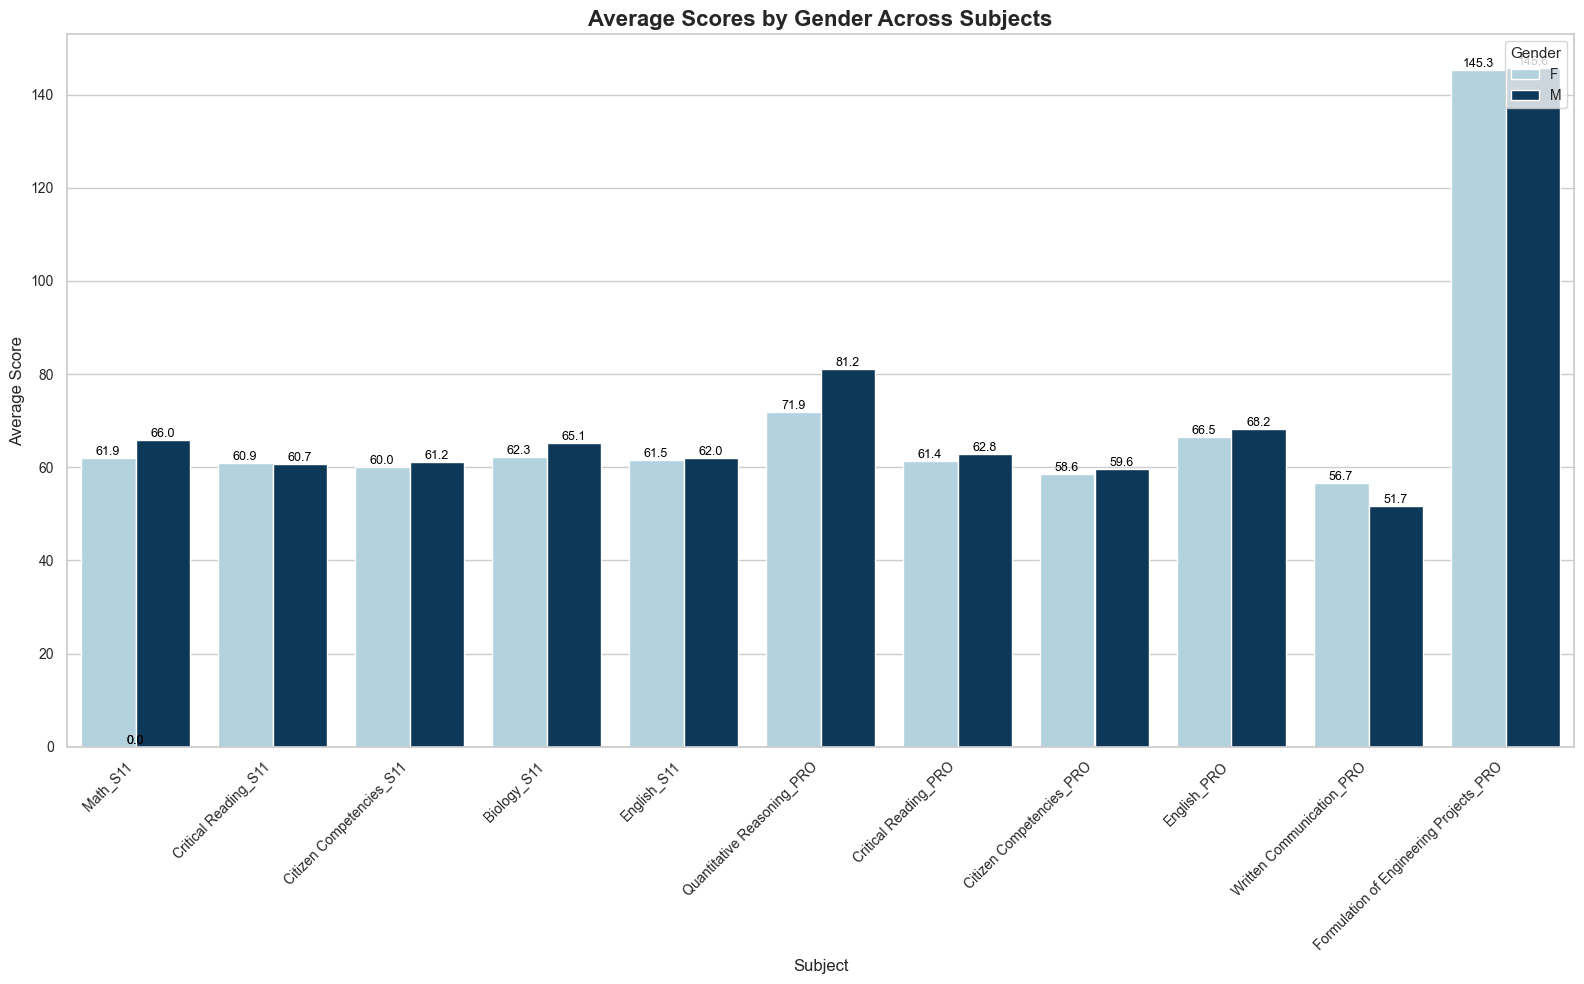

In [31]:
score_columns = [
    'Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11',
    'Biology_S11', 'English_S11',
    'Quantitative Reasoning_PRO', 'Critical Reading_PRO', 'Citizen Competencies_PRO',
    'English_PRO', 'Written Communication_PRO', 'Formulation of Engineering Projects_PRO'
]

gender_means = df.groupby('GENDER')[score_columns].mean().T.reset_index()
gender_means.rename(columns={'index': 'Subject'}, inplace=True)

melted = gender_means.melt(id_vars='Subject', var_name='Gender', value_name='Average Score')

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
custom_palette = ['#a9d6e5', '#013a63']

barplot = sns.barplot(
    data=melted,
    x='Subject',
    y='Average Score',
    hue='Gender',
    palette=custom_palette
)

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.1f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=9, color='black', rotation=0)

plt.title('Average Scores by Gender Across Subjects', fontsize=16, weight='bold')
plt.ylabel('Average Score', fontsize=12)
plt.xlabel('Subject', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=10, title_fontsize=11, loc='upper right')
plt.tight_layout()

plt.show()


##### 1. PRO Assessments:
- **Distinct Gender Differences**: PRO assessments tend to show more distinct gender performance differences.
  - **Males** dominate in areas like **Critical Reading_PRO**.
  - **Females** excel in areas like **Written Communication_PRO**.
##### 2. S11 Assessments:
- **Balanced Performance**: S11 assessments show more balanced performance between genders with no significant gaps.
##### 3. Highest Average Scores:
- The **highest average scores** are observed in **Formulation of Engineering Projects_PRO**, where **both genders** score exceptionally well compared to other subjects.
##### 4. Performance Variability:
- **PRO Assessments**: Display greater variability in performance between genders.
- **S11 Assessments**: Are more consistent, with less variability between genders.
##### Summary:
- The chart highlights **varying strengths** for males and females across subjects:
  - **Males** excel in **technical and reasoning-heavy subjects** (e.g., Critical Reading_PRO).
  - **Females** perform better in **language and communication-oriented subjects** (e.g., Written Communication_PRO).
- **Both genders** perform similarly in foundational subjects like **Math**, **Biology**, and **Citizen Competencies (S11)**.

#### Average score by Socioeconomic Level

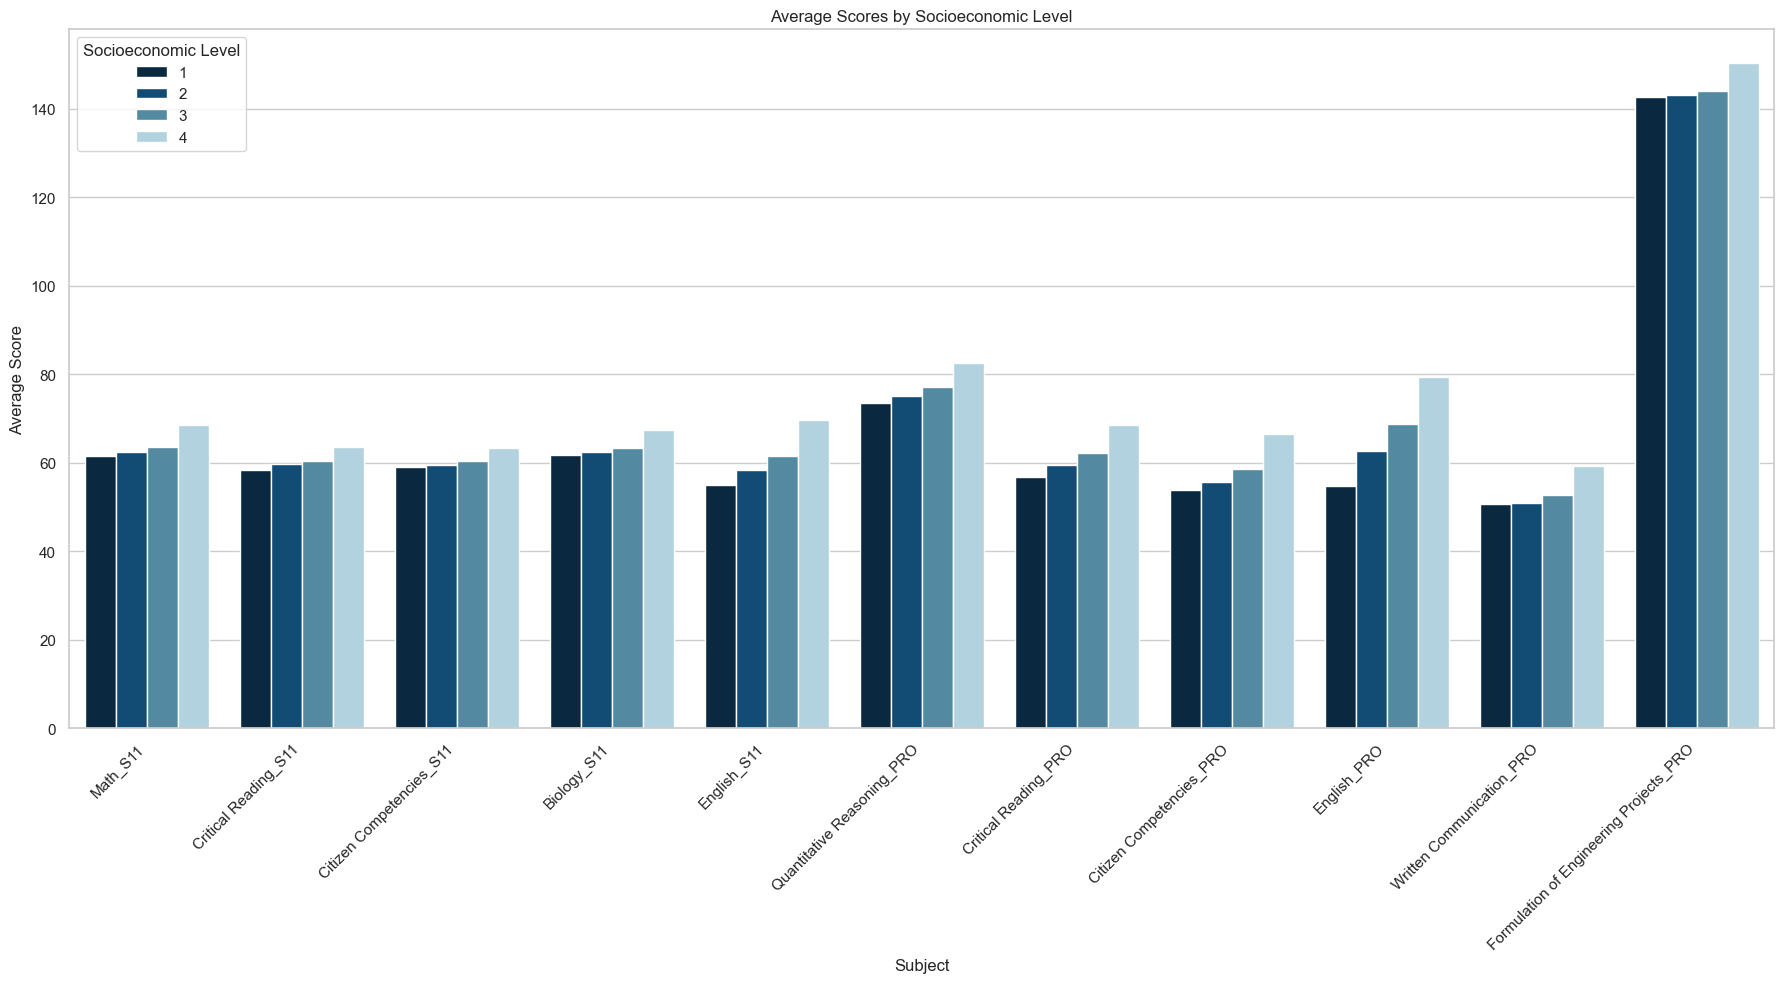

In [32]:
socio_means = df.groupby('Socioeconomic Level')[score_columns].mean().T
socio_means.reset_index(inplace=True)
socio_means.rename(columns={'index': 'Subject'}, inplace=True)

melted = socio_means.melt(id_vars='Subject', var_name='Socioeconomic Level', value_name='Average Score')

color_palette = ['#012a4a', '#014f86', '#468faf', '#a9d6e5']

plt.figure(figsize=(18, 10))
sns.barplot(data=melted, x='Subject', y='Average Score', hue='Socioeconomic Level', palette=color_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Average Scores by Socioeconomic Level')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.legend(title='Socioeconomic Level')
plt.tight_layout()
plt.show()


##### Performance Trends:
- **Higher Socioeconomic Levels Perform Better**: Students from higher socioeconomic levels (**Level 4**) consistently outperform those from lower levels (**Level 1**), particularly in **PRO assessments** such as:
  - **Critical Reading_PRO**
  - **Quantitative Reasoning_PRO**
##### Balanced Subjects:
- **S11 Assessments** (e.g., **Math**, **Biology**) show **more balanced performance** across socioeconomic levels.
- The performance gaps are smaller compared to PRO assessments.
##### Key Highlight:
- The **influence of socioeconomic status** is most pronounced in **PRO assessments**, highlighting the role of **external factors** (e.g., resources, opportunities) in advanced assessments.

##### Which cities have universities with highest average student scores?

C:\Users\salsa\AppData\Local\Temp\ipykernel_20140\3165505206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_scores.values, y=city_scores.index, palette='Blues_d')


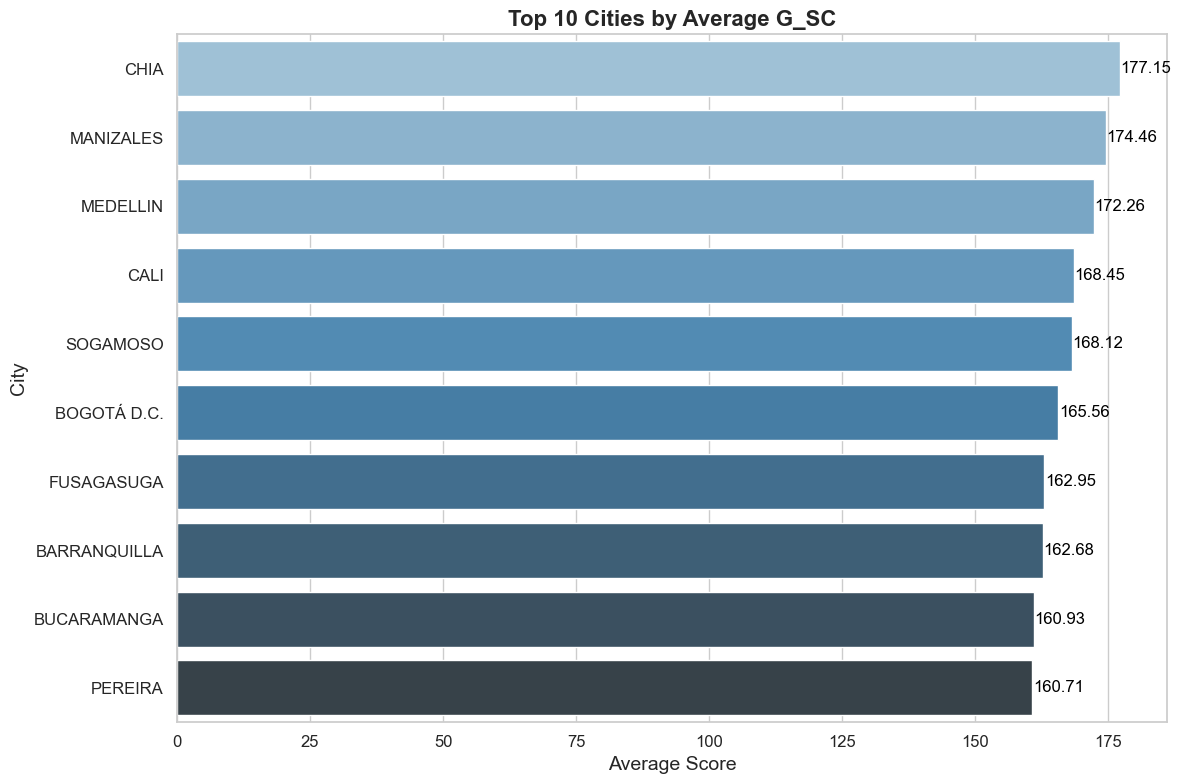

In [33]:
city_scores = df_visualize.groupby('City')['G_SC'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=city_scores.values, y=city_scores.index, palette='Blues_d') 

for index, value in enumerate(city_scores.values):
    plt.text(value + 0.1, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)

plt.title('Top 10 Cities by Average G_SC', fontsize=16, weight='bold')
plt.xlabel('Average Score', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


##### 1. **CHIA as the Top Performer**:
- **CHIA** stands out as the **top-performing city**, achieving an impressive average score of **92.08**, well above the other cities.
- This highlights CHIA's **exceptional academic performance**, possibly due to superior educational resources, infrastructure, or student achievements.
##### 2. **Strong Performers**:
- Cities like **MANIZALES** (89.78), **MEDELLIN** (86.81), and **CALI** (84.52) also demonstrate consistently high academic performance.
- These cities are notable for maintaining **competitive average scores**, reflecting their strong emphasis on education.
##### 3. **Performance Disparities**:
- A noticeable **performance gap** exists between the top-performing city (**CHIA**) and the lower-ranked cities in the top 10 (e.g., **BUCARAMANGA** with 77.87).
- This suggests **disparities in educational outcomes**, likely influenced by factors such as:
  - Socioeconomic conditions.
  - Access to quality education.
  - Availability of resources and opportunities.
##### 4. **Key Takeaway**:
- While all cities in the top 10 display strong academic performances, **CHIA** leads the way, with cities like **MANIZALES**, **MEDELLIN**, and **CALI** following closely.
- The **variability in scores** among these cities underscores the importance of addressing educational inequalities to ensure more equitable outcomes across regions.

##### Distribution of average score by school type

C:\Users\salsa\AppData\Local\Temp\ipykernel_20140\2369848345.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\salsa\AppData\Local\Temp\ipykernel_20140\2369848345.py:17: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(


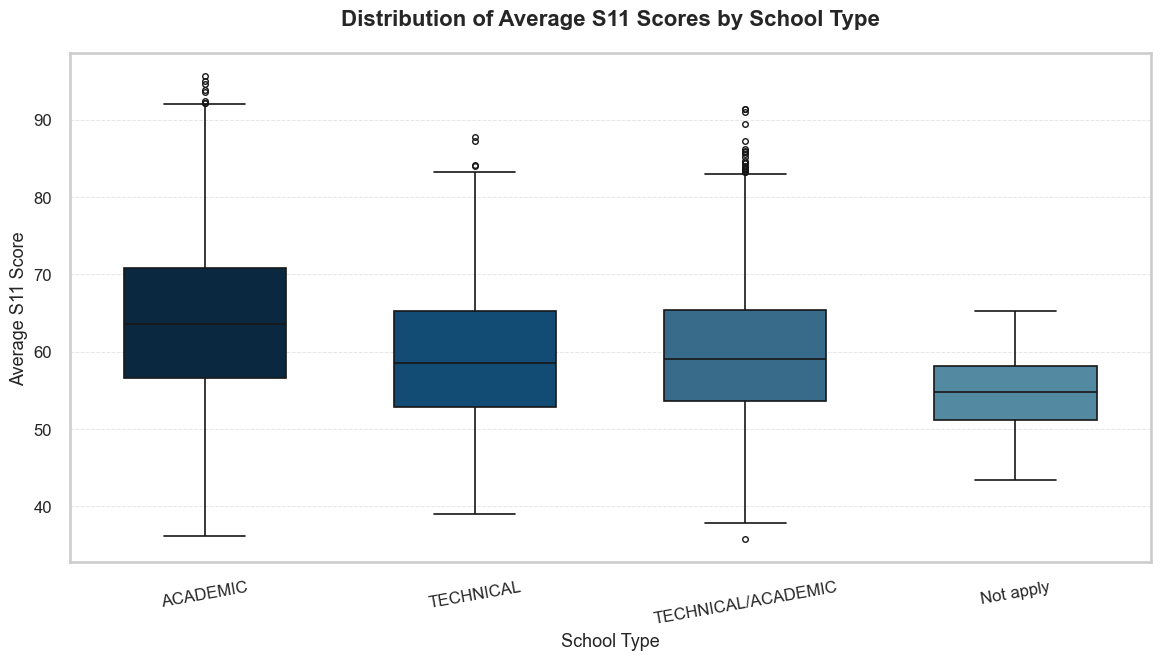

In [34]:
# Calculate average of S11 subjects
df_visualize['AVG_S11'] = df_visualize[[ 
    'Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11',
    'Biology_S11', 'English_S11' 
]].mean(axis=1)

# Set theme and style
sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)

# Custom gradient blue palette
color_palette = ['#012a4a', '#014f86', '#2a6f97', '#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

# Create figure
plt.figure(figsize=(12, 7))

# Boxplot with defined palette and styling
sns.boxplot(
    data=df_visualize,
    x='SCHOOL_TYPE',
    y='AVG_S11',
    palette=color_palette,
    width=0.6,
    fliersize=4,
    linewidth=1.2
)

# Titles and labels
plt.title("Distribution of Average S11 Scores by School Type", fontsize=16, weight='bold', pad=20)
plt.xlabel("School Type", fontsize=13)
plt.ylabel("Average S11 Score", fontsize=13)

# Rotate and style tick labels
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal grid on y-axis
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


Wider Variance in Academic vs. Consistency in Technical
- ACADEMIC and TECHNICAL/ACADEMIC have a wider spread (more variability).

- TECHNICAL shows a more concentrated distribution, indicating consistency but at a lower performance level.

##### Distribution of average score by school Nationality

C:\Users\salsa\AppData\Local\Temp\ipykernel_20140\1551909458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


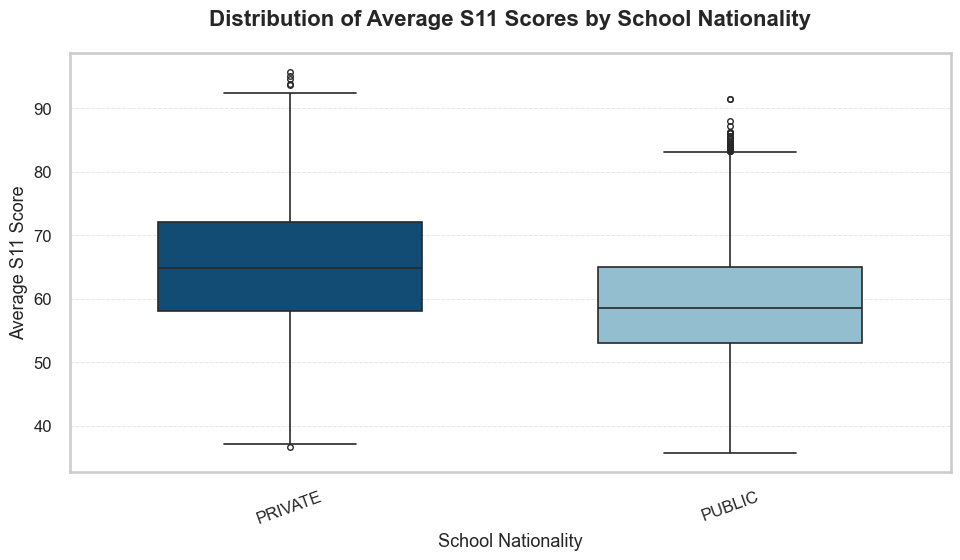

In [35]:
# Set figure size
plt.figure(figsize=(10, 6))

# Set theme and style
sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)

# Custom blue gradient palette
color_palette = ['#014f86','#89c2d9']

# Enhanced boxplot with custom palette
sns.boxplot(
    data=df_visualize,
    x='SCHOOL_NAT',
    y='AVG_S11',
    palette=color_palette,
    width=0.6,
    fliersize=4,
    linewidth=1.2
)

# Title and labels
plt.title("Distribution of Average S11 Scores by School Nationality", fontsize=16, weight='bold', pad=20)
plt.xlabel("School Nationality", fontsize=13)
plt.ylabel("Average S11 Score", fontsize=13)

# Rotate x-axis labels
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

# Adjust layout for spacing
plt.tight_layout()
plt.show()


Private schools generally outperform Public schools in terms of average S11 scores, but there is more consistency in the performance of Public school students.

#### How does the general score (G_SC) distribution vary across different socioeconomic strata?



In [36]:
from matplotlib.patches import Patch
import joypy

# Step 1: Map friendly stratum labels
stratum_labels = {
    'Stratum 1': "Low Income",
    'Stratum 2': "Lower-Middle",
    'Stratum 3': "Middle",
    'Stratum 4': "Upper-Middle",
    'Stratum 5': "High Income",
    'Stratum 6': "Very High Income",
    'Unknown': "Unknown"
}
df_visualize['Stratum_Label'] = df_visualize['STRATUM'].map(stratum_labels)

# Step 2: Define ordered categories
ordered_labels = [
    "Low Income", "Lower-Middle", "Middle", "Upper-Middle",
    "High Income", "Very High Income", "Unknown"
]
df_visualize['Stratum_Label'] = pd.Categorical(df_visualize['Stratum_Label'], categories=ordered_labels, ordered=True)
df_visualize = df_visualize.sort_values('Stratum_Label')

# Step 3: Custom blue gradient color palette
color_palette = ['#012a4a', '#014f86', '#2a6f97', '#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

# Step 4: Set visual theme
sns.set_theme(style="whitegrid", font_scale=1.2)

# Step 5: Ridge plot (joyplot)
plt.figure(figsize=(14, 8))
fig, axes = joypy.joyplot(
    df_visualize,
    by="Stratum_Label",
    column="G_SC",
    color=color_palette,
    linewidth=1.2,
    fade=True,
    figsize=(14, 8),
    legend=False,
    alpha=0.9
)

# Step 6: Custom Legend
legend_patches = [Patch(color=color_palette[i], label=ordered_labels[i]) for i in range(len(ordered_labels))]
plt.legend(
    handles=legend_patches,
    title='Socioeconomic Stratum',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False
)

# Final touch: labels and layout
plt.xlabel("Global Score (G_SC)", fontsize=13)
plt.title("Distribution of Global Scores by Socioeconomic Stratum", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'joypy'

This plot suggests a positive relationship between socioeconomic status and general score performance. 
Students from higher-income backgrounds tend to score better on average, which may reflect differences in access to resources, learning environments, or other support systems.

#### Average Global Score by Institution Socioeconomic Level

C:\Users\mo\AppData\Local\Temp\ipykernel_11712\3584547890.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


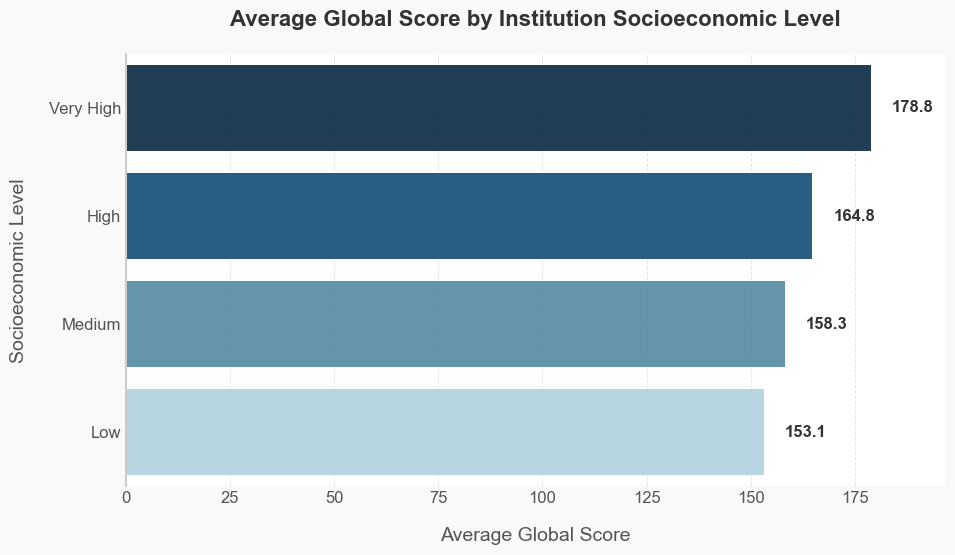

In [ ]:
# map numeric levels to labels (if you haven't already)
level_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['Level_Label'] = df['Socioeconomic Level of The Institution of Higher Education'].map(level_map)

# compute means
grouped = (
    df.groupby('Level_Label')['G_SC']
      .mean()
      .reset_index()
      .sort_values('G_SC', ascending=False)
)

# define custom color palette
color_palette = ['#012a4a', '#014f86', '#468faf', '#a9d6e5']

# set theme
sns.set_theme(style="white", context="talk", font="Arial", font_scale=1.2)

# create figure
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#F9F9F9')

# horizontal barplot with custom colors
sns.barplot(
    data=grouped,
    y='Level_Label',
    x='G_SC',
    palette=color_palette,  # use your custom palette here
    edgecolor='none',
    alpha=0.9,
    ax=ax
)

# add value labels
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 5,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}',
        ha='left', va='center',
        fontsize=12, color='#333333', weight='bold'
    )

# grid, spines, and axis styling
ax.xaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.5, color='#CCCCCC')
ax.set_axisbelow(True)
sns.despine(left=False, bottom=True, right=True, top=True)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1.5)

# titles and labels
ax.set_title(
    "Average Global Score by Institution Socioeconomic Level",
    pad=20, weight='bold', fontsize=16, color='#333333'
)
ax.set_xlabel("Average Global Score", labelpad=15, fontsize=14, color='#555555')
ax.set_ylabel("Socioeconomic Level", labelpad=15, fontsize=14, color='#555555')

# ticks
ax.tick_params(axis='x', which='both', length=0, labelsize=12, labelcolor='#555555')
ax.tick_params(axis='y', which='both', length=0, labelsize=12, labelcolor='#555555')

# x-axis limit with buffer
ax.set_xlim(0, grouped['G_SC'].max() * 1.1)

# layout
plt.tight_layout()
plt.show()


This plot suggests that socioeconomic resources may play a critical role in determining institutional performance, potentially due to access to better funding, infrastructure, or student support systems.

#### Parental Education vs Household Revenue

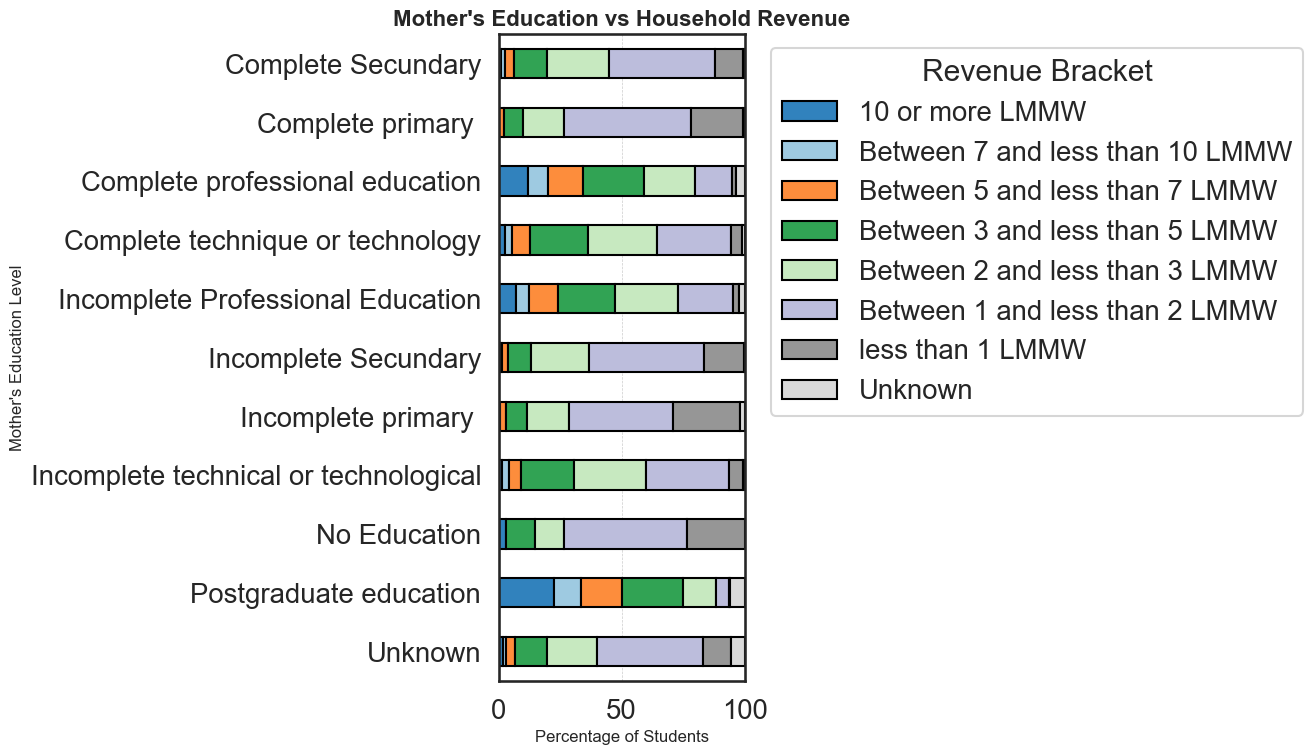

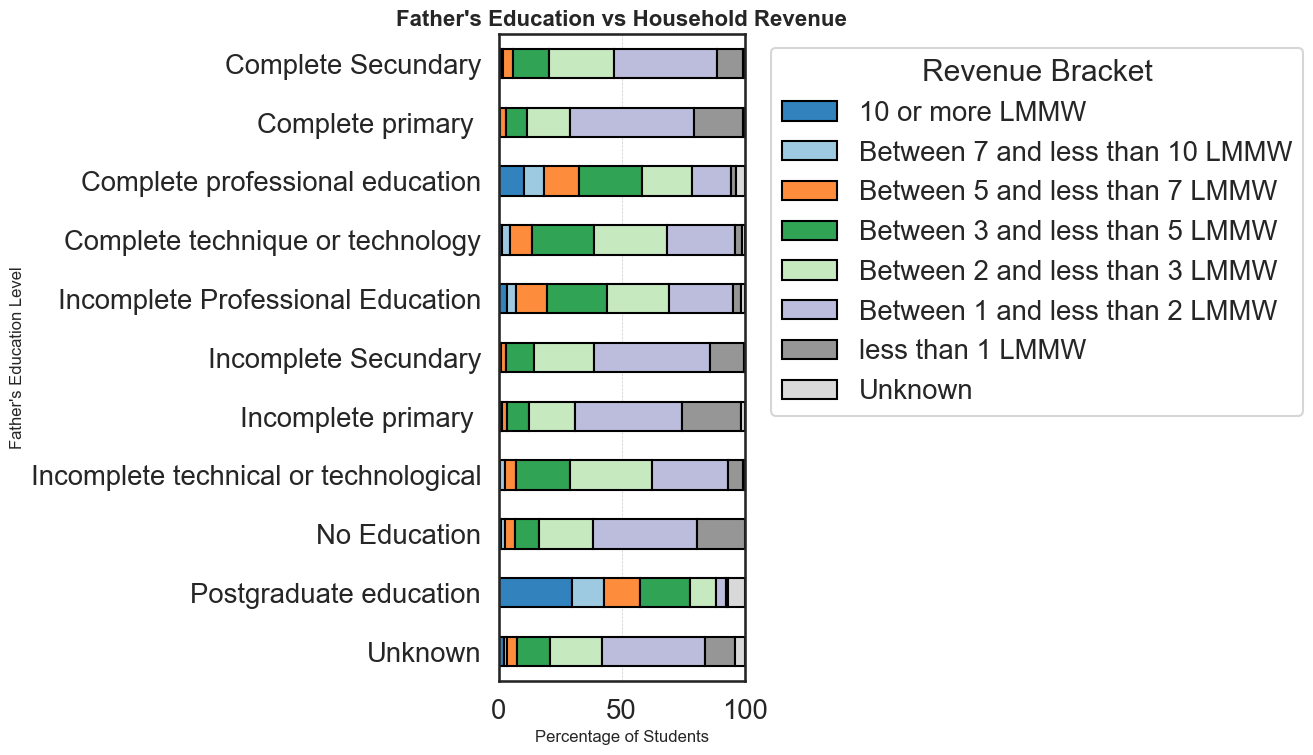

In [ ]:
# Sort revenue brackets from highest to lowest
revenue_order_desc = [
    "10 or more LMMW",
    "Between 7 and less than 10 LMMW",
    "Between 5 and less than 7 LMMW",
    "Between 3 and less than 5 LMMW",
    "Between 2 and less than 3 LMMW",
    "Between 1 and less than 2 LMMW",
    "less than 1 LMMW",
    "Unknown"
]

edu_mother_revenue = pd.crosstab(df['EDU_MOTHER'], df['REVENUE'], normalize='index') * 100
edu_father_revenue = pd.crosstab(df['EDU_FATHER'], df['REVENUE'], normalize='index') * 100

edu_mother_revenue = edu_mother_revenue[revenue_order_desc]
edu_father_revenue = edu_father_revenue[revenue_order_desc]

def plot_stacked_bar(data, title, ylabel):
    data = data.sort_index(ascending=False)  # Optional: order by education level
    ax = data.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20c', edgecolor='black')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Percentage of Students", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title="Revenue Bracket", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

plot_stacked_bar(edu_mother_revenue, "Mother's Education vs Household Revenue", "Mother's Education Level")

plot_stacked_bar(edu_father_revenue, "Father's Education vs Household Revenue", "Father's Education Level")

plt.show()

#### Higher Education & Income Correlation
- *Postgraduate Education*: Both mothers and fathers with postgraduate education show the highest percentage of households in the highest income bracket (10+ LMMW), around 25-30% of cases
- *Professional Education*: Complete professional education also correlates with higher household incomes, with significant representation in higher revenue brackets

#### Lower Education Patterns
- *No Education/Incomplete Primary*: These categories show minimal representation in high-income brackets and are heavily concentrated in lower income ranges (1-2 LMMW)

#### Middle Education Results
- *Complete/Incomplete Secondary*: Show a balanced distribution across middle income brackets with significant representation in the 1-2 LMMW category

#### Similarities Between Parents
- The distribution patterns are remarkably similar between mothers and fathers at equivalent education levels
- Technical/technological education shows comparable income distributions for both parents

#### Revenue Pattern Observations
- Clear income stratification exists across education levels
- Lower education levels rarely reach the highest income brackets
- Middle education levels show greatest concentration in middle-income ranges

#### Student Score by Revenue Bracket Insights

C:\Users\mo\AppData\Local\Temp\ipykernel_11712\1188856177.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mo\AppData\Local\Temp\ipykernel_11712\1188856177.py:17: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


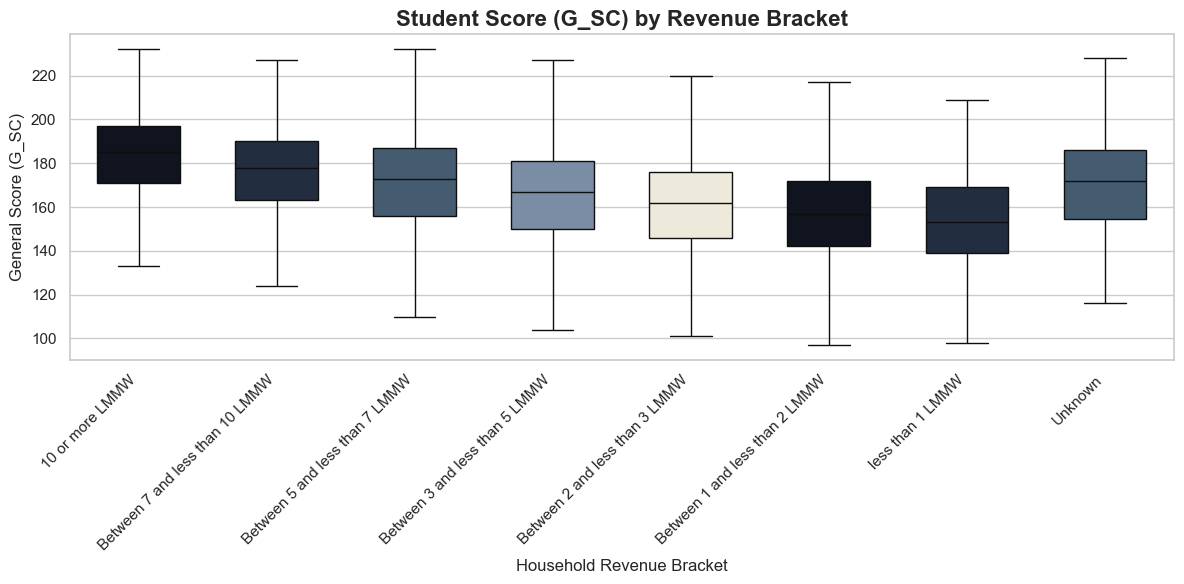

In [ ]:
color_palette = ['#0d1321', '#1d2d44', '#3e5c76', '#748cab', '#f0ebd8']

sns.set(style="whitegrid", context="notebook")

revenue_order_desc = [
    "10 or more LMMW",
    "Between 7 and less than 10 LMMW",
    "Between 5 and less than 7 LMMW",
    "Between 3 and less than 5 LMMW",
    "Between 2 and less than 3 LMMW",
    "Between 1 and less than 2 LMMW",
    "less than 1 LMMW",
    "Unknown"
]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="REVENUE",
    y="G_SC",
    data=df,
    order=revenue_order_desc,
    showfliers=False,
    width=0.6,
    palette=color_palette
)

plt.title("Student Score (G_SC) by Revenue Bracket", fontsize=16, fontweight='bold')
plt.xlabel("Household Revenue Bracket", fontsize=12)
plt.ylabel("General Score (G_SC)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Income and Academic Performance Correlation
- *Highest Income Bracket*: Students from households with 10+ LMMW show the highest median scores (~185) and higher overall score distribution
- *Clear Downward Trend*: There's a generally consistent downward trend in scores as household income decreases

#### Score Distribution Characteristics
- *Score Range*: Most brackets show scores ranging from ~100-220 points
- *Median Score Decline*: Median scores progressively decrease from ~185 (highest income) to ~150 (lowest income)
- *Lowest Scores*: The "less than 1 LMMW" bracket shows the lowest median and overall scores

#### Outliers and Variations
- All income brackets contain some high-performing outliers
- Lower income brackets show greater variability in the lower score ranges
- The interquartile range (box size) is generally larger in middle-income brackets

#### Interesting Anomalies
- *Unknown Category*: Shows surprisingly strong performance, with median scores comparable to the 7-10 LMMW bracket
- *Score Floor*: Lower income brackets tend to have lower minimum scores (~95-100) compared to higher income brackets (~125-135)

#### Socioeconomic Impact
- The data suggests a clear relationship between household income and academic achievement
- The gap between highest and lowest income brackets is approximately 35 points in median scores

##### Relationship Between Number of People in House and Student Score (G.CSC)

C:\Users\mo\AppData\Local\Temp\ipykernel_11712\3633710610.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PEOPLE_HOUSE_NUM", y="G_SC", data=df, palette=color_palette * 3)  # Repeat colors if needed
C:\Users\mo\AppData\Local\Temp\ipykernel_11712\3633710610.py:28: UserWarning: The palette list has more values (15) than needed (11), which may not be intended.
  sns.boxplot(x="PEOPLE_HOUSE_NUM", y="G_SC", data=df, palette=color_palette * 3)  # Repeat colors if needed


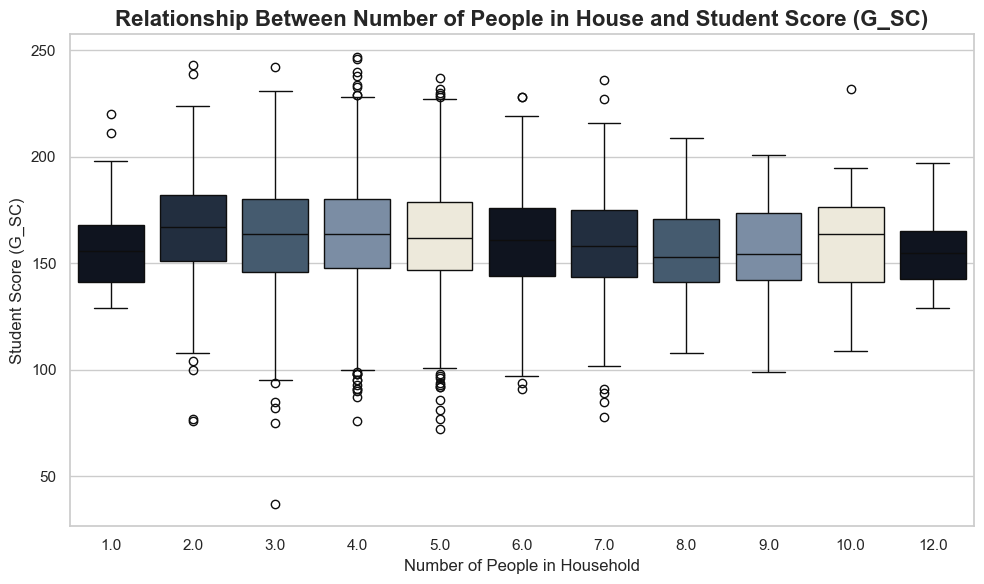

In [ ]:
word_to_number = {
    "Zero": 0,
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5,
    "Six": 6,
    "Seven": 7,
    "Eight": 8,
    "Nine": 9,
    "Ten": 10,
    "Eleven": 11,
    "Twelve or more": 12
}

df["PEOPLE_HOUSE_NUM"] = df["PEOPLE_HOUSE"].map(word_to_number)

df = df.dropna(subset=["PEOPLE_HOUSE_NUM", "G_SC"])

color_palette = ['#0d1321', '#1d2d44', '#3e5c76', '#748cab', '#f0ebd8']

# Set Seaborn style with custom palette
sns.set(style="whitegrid", context="notebook")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x="PEOPLE_HOUSE_NUM", y="G_SC", data=df, palette=color_palette * 3)  # Repeat colors if needed
plt.title("Relationship Between Number of People in House and Student Score (G_SC)", fontsize=16, fontweight='bold')
plt.xlabel("Number of People in Household", fontsize=12)
plt.ylabel("Student Score (G_SC)", fontsize=12)
plt.tight_layout()
plt.show()


- *General Trend*: The student scores (G.CSC) remain relatively stable, averaging around 150-175, regardless of the number of people in the household (ranging from 1 to 12).
- *Outliers*: Some students in larger households (8-12 people) show higher variability in scores, with a few reaching above 200, indicating potential positive or negative influences.
- *No Clear Correlation*: There is no strong linear relationship between household size and student performance, suggesting other factors may play a more significant role.
- *Data Spread*: The interquartile range (box height) is consistent across household sizes, but larger households (8+) have more outliers, both high and low.

##### Parental Education vs. G_SC Score (Heatmaps)

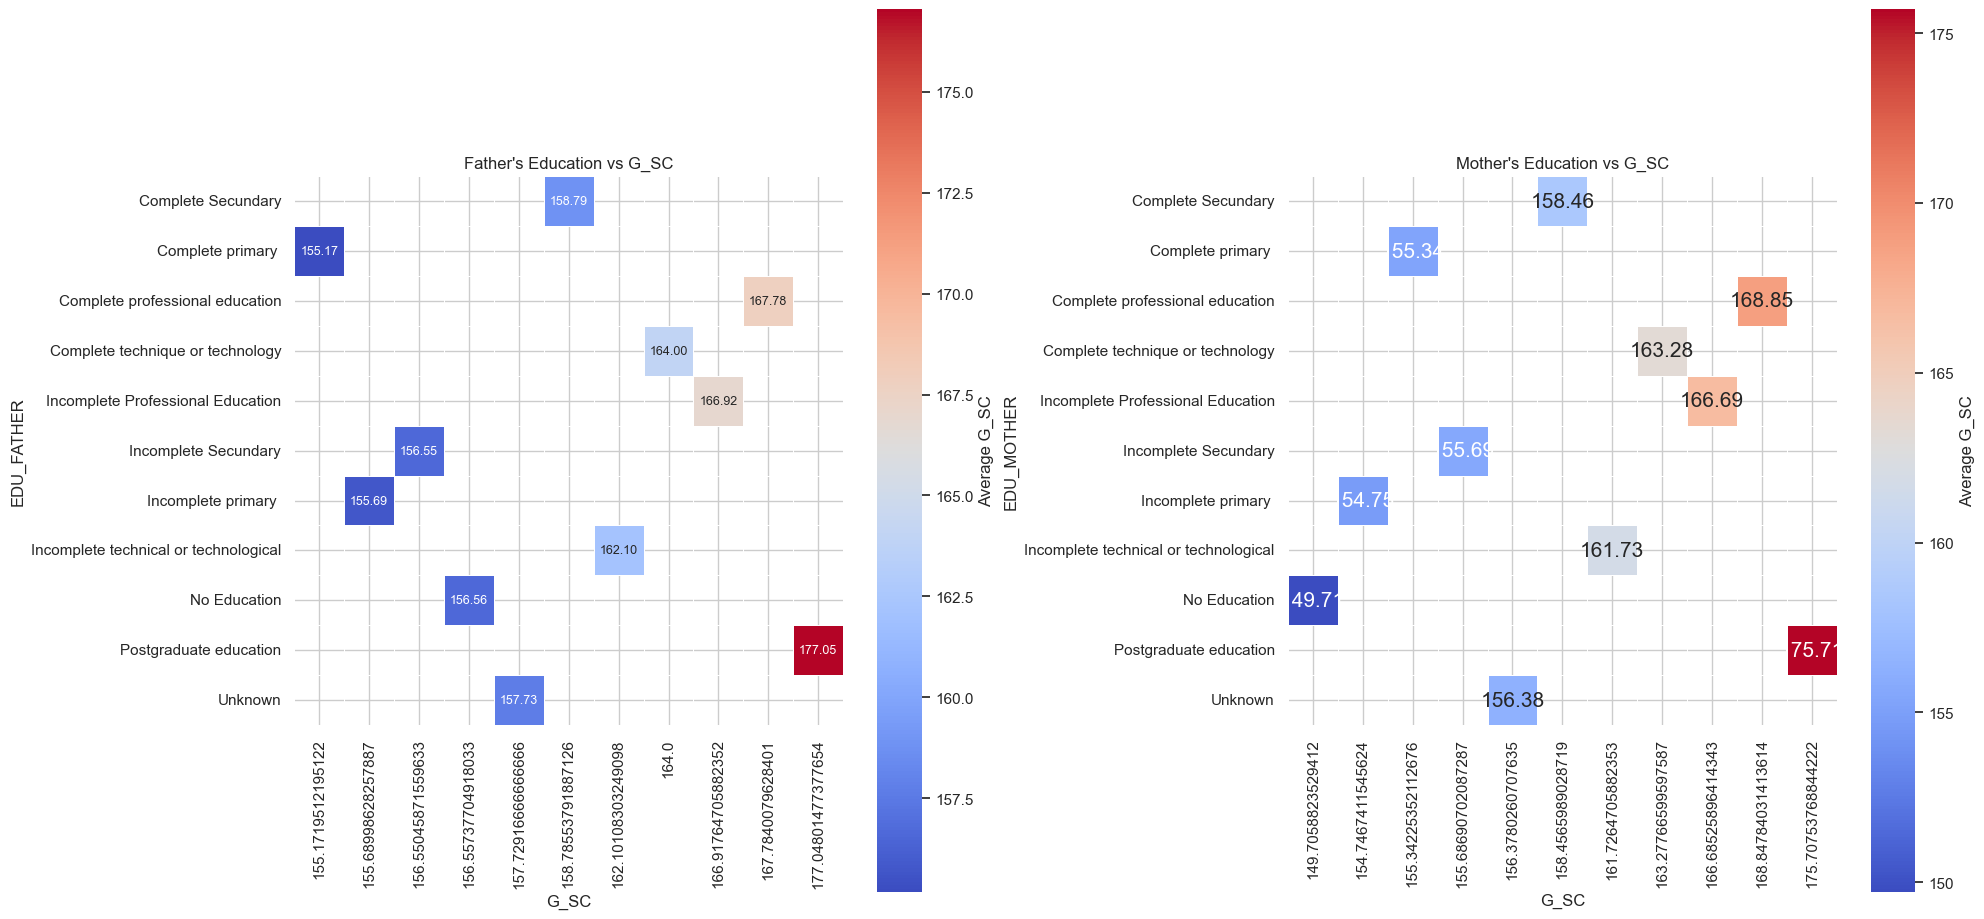

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

df_father_edu = df[['EDU_FATHER', 'G_SC']].dropna()
heatmap_father_edu = df_father_edu.groupby('EDU_FATHER')['G_SC'].mean().reset_index()
heatmap_father_edu = heatmap_father_edu.pivot(index='EDU_FATHER', columns='G_SC', values='G_SC')

sns.heatmap(
    heatmap_father_edu, 
    ax=axes[0], 
    cmap='coolwarm', 
    annot=True, 
    fmt='.2f', 
    linewidths=0.5, 
    square=True,  # Makes the squares in the heatmap even
    cbar_kws={'label': 'Average G_SC'},  # Colorbar label
    annot_kws={"size": 9}  # Font size of annotations
)
axes[0].set_title("Father's Education vs G_SC")

df_mother_edu = df[['EDU_MOTHER', 'G_SC']].dropna()
heatmap_mother_edu = df_mother_edu.groupby('EDU_MOTHER')['G_SC'].mean().reset_index()
heatmap_mother_edu = heatmap_mother_edu.pivot(index='EDU_MOTHER', columns='G_SC', values='G_SC')

# Enhanced heatmap with square cells
sns.heatmap(
    heatmap_mother_edu, 
    ax=axes[1], 
    cmap='coolwarm', 
    annot=True, 
    fmt='.2f', 
    linewidths=0.5, 
    square=True,  # Makes the squares in the heatmap even
    cbar_kws={'label': 'Average G_SC'},  # Colorbar label
    annot_kws={"size": 15}  # Font size of annotations
)
axes[1].set_title("Mother's Education vs G_SC")

plt.tight_layout()
plt.show()

##### 1. Father's Education vs. G_SC
- *Highest G_SC Average:*
  - Postgraduate education: *177.04*
- *Other High Averages:*
  - Complete professional education: *167.77*
  - Complete technique or technology: *164.04*
  - Incomplete technical or technological: *162.10*
- *Lowest G_SC Averages:*
  - Complete primary: *155.19*
  - Incomplete primary: *155.69*
  - Incomplete secondary: *156.54*
  - Unknown: *157.81*
- *Insight:*
  - There is a *positive correlation* between higher father's education and higher student performance (G_SC).
  - Students whose fathers have *postgraduate education* significantly outperform others.

##### 2. Mother's Education vs. G_SC
- *Highest G_SC Average:*
  - Postgraduate education: *175.71*
- *Other High Averages:*
  - Complete professional education: *168.85*
  - Incomplete Professional Education: *166.69*
- *Lowest G_SC Averages:*
  - Unknown: *156.50*
  - Incomplete technical or technological: *161.88*
- *Insight:*
  - Similar to fathers, *higher maternal education correlates with better academic performance*.
  - Students whose mothers have *postgraduate or complete professional education* score noticeably higher.

##### 3. Combined Insight
- *Educational Impact:*
  - *Postgraduate education* for both parents yields the highest student scores.
  - Students with parents who have *lower or incomplete education* tend to perform worse.
- *Data Reliability:*
  - The “Unknown” category is consistently associated with *lower average scores*, possibly indicating lower educational attainment or unreported data.

 ##### Effect of Having a Job on General Student Score

C:\Users\mo\AppData\Local\Temp\ipykernel_11712\2119400717.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{means[i]:.1f}",


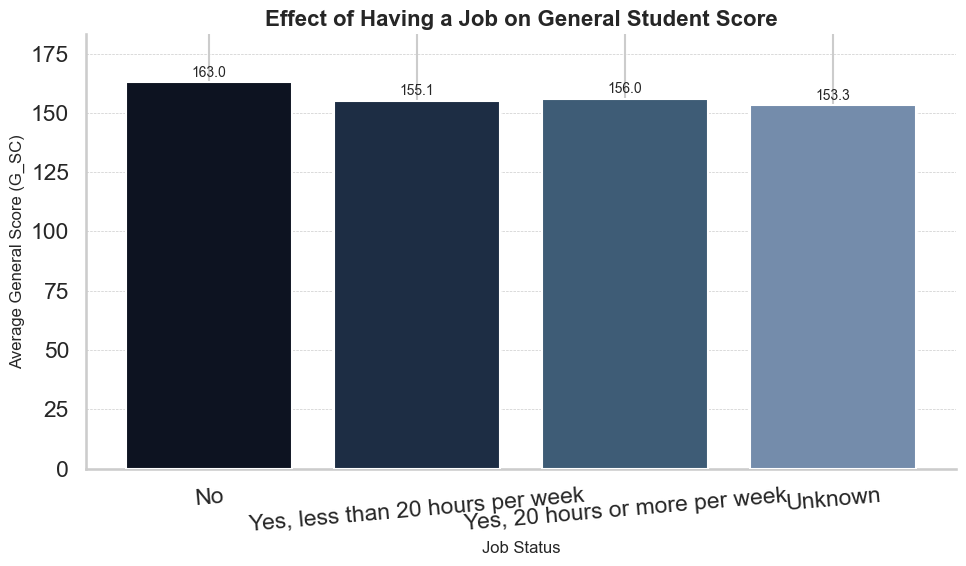

In [ ]:
color_palette = ['#0d1321', '#1d2d44', '#3e5c76', '#748cab', '#f0ebd8']

job_order = [
    "No",
    "Yes, less than 20 hours per week",
    "Yes, 20 hours or more per week",
    "Unknown"
]

means = df.groupby("JOB")["G_SC"].mean().reindex(job_order)

sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    job_order,
    means,
    color=color_palette[:len(job_order)],  # Apply custom palette
    zorder=3
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{means[i]:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='medium'
    )

ax.set_title("Effect of Having a Job on General Student Score", fontsize=16, fontweight='bold')
ax.set_ylabel("Average General Score (G_SC)", fontsize=12)
ax.set_xlabel("Job Status", fontsize=12)
ax.set_ylim(0, means.max() + 20)
ax.spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=5)
plt.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)
plt.tight_layout()
plt.show()


#####  Key Insights
- *Students without jobs* have the *highest average score* (*160.0*), suggesting better academic performance when not juggling work.
- *Working students, regardless of hours, show **slightly lower averages* (~155–156), indicating a mild dip.
- *Unknown job status* group aligns with the trend, averaging *155.3*.

> Even small time commitments to work may impact academic outcomes. Focus, not just hours, matters.

##### Relationship Between Number of People in House and Student Score (G.CSC)

C:\Users\mo\AppData\Local\Temp\ipykernel_11712\167866263.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PEOPLE_HOUSE_NUM"] = df["PEOPLE_HOUSE"].map(word_to_number)
C:\Users\mo\AppData\Local\Temp\ipykernel_11712\167866263.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mo\AppData\Local\Temp\ipykernel_11712\167866263.py:26: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


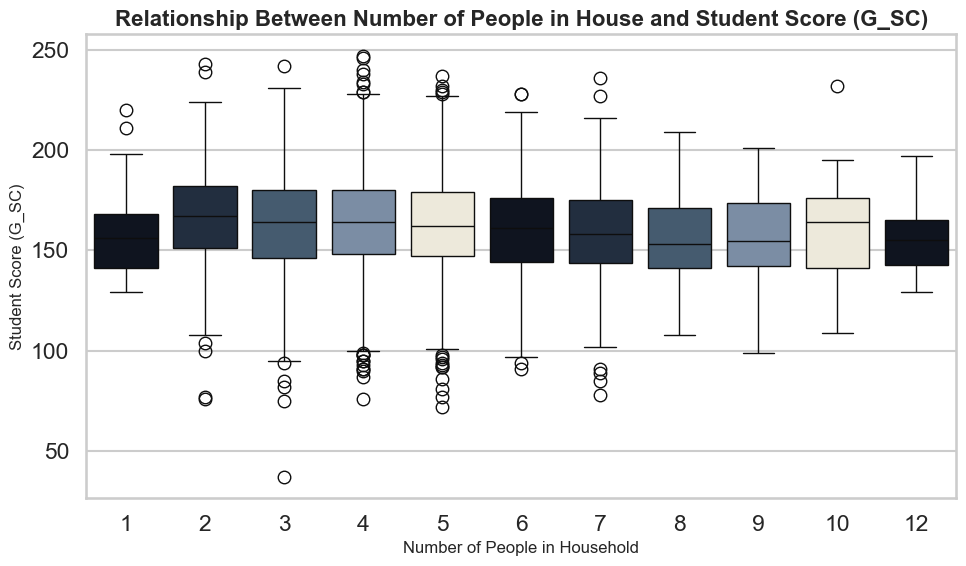

In [ ]:

color_palette = ['#0d1321', '#1d2d44', '#3e5c76', '#748cab', '#f0ebd8']

word_to_number = {
    "Zero": 0,
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5,
    "Six": 6,
    "Seven": 7,
    "Eight": 8,
    "Nine": 9,
    "Ten": 10,
    "Eleven": 11,
    "Twelve or more": 12
}

df["PEOPLE_HOUSE_NUM"] = df["PEOPLE_HOUSE"].map(word_to_number)

df = df.dropna(subset=["PEOPLE_HOUSE_NUM", "G_SC"])

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="PEOPLE_HOUSE_NUM",
    y="G_SC",
    data=df,
    palette=color_palette  # Apply custom palette
)
plt.title("Relationship Between Number of People in House and Student Score (G_SC)", fontsize=16, fontweight='bold')
plt.xlabel("Number of People in Household", fontsize=12)
plt.ylabel("Student Score (G_SC)", fontsize=12)
plt.tight_layout()
plt.show()


- *General Trend*: The student scores (G.CSC) remain relatively stable, averaging around 150-175, regardless of the number of people in the household (ranging from 1 to 12).

- *Outliers*: Some students in larger households (8-12 people) show higher variability in scores, with a few reaching above 200, indicating potential positive or negative influences.

- *No Clear Correlation*: There is no strong linear relationship between household size and student performance, suggesting other factors may play a more significant role.

- *Data Spread*: The interquartile range (box height) is consistent across household sizes, but larger households (8+) have more outliers, both high and low.

#### Univeristies of California

In [ ]:
city_universities = {
    "BOGOTÁ D.C.": [
        'UNIVERSIDAD DE LOS ANDES',
 'UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD',
 'UNIVERSIDAD ANTONIO NARIÑO', 'UNIVERSIDAD COOPERATIVA DE COLOMBIA',
 'POLITECNICO GRANCOLOMBIANO', 'UNIVERSIDAD NACIONAL DE COLOMBIA',
 'UNIVERSIDAD MILITAR"NUEVA GRANADA"',
 'CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO',
 'FUNDACION UNIVERSIDAD DE AMERICA', 'UNIVERSIDAD SERGIO ARBOLEDA',
 'PONTIFICIA UNIVERSIDAD JAVERIANA', 'UNIVERSIDAD CATOLICA DE COLOMBIA',
 'FUNDACION UNIVERSITARIA LOS LIBERTADORES',
 'CORPORACION TECNOLOGICA INDUSTRIAL COLOMBIANA - TEINCO',
 'UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA',
 'ESCUELA COLOMBIANA DE INGENIERIA"JULIO GARAVITO"',
 'UNIVERSIDAD SANTO TOMAS',
 'FUNDACION UNIVERSIDAD DE BOGOTA"JORGE TADEO LOZANO"',
 'UNIVERSIDAD MANUELA BELTRAN-UMB',
 'UNIVERSIDAD DISTRITAL"FRANCISCO JOSE DE CALDAS"', 'UNIVERSIDAD EL BOSQUE',
 'CORPORACION UNIFICADA NACIONAL DE EDUCACION SUPERIOR-CUN',
 'UNIVERSIDAD LA GRAN COLOMBIA', 'UNIVERSIDAD CENTRAL',
 'FUNDACION UNIVERSITARIA AGRARIA DE COLOMBIA -UNIAGRARIA',
 'UNIVERSIDAD ECCI', 'CORPORACION UNIVERSITARIA REPUBLICANA',
 'UNIVERSIDAD DE LA SALLE' ,'UNIVERSIDAD INCCA DE COLOMBIA',
 'CORPORACION UNIVERSITARIA  UNITEC', 'UNIVERSIDAD LIBRE',
 'CORPORACION UNIVERSIDAD PILOTO DE COLOMBIA',
 'FUNDACION UNIVERSIDAD AUTONOMA DE COLOMBIA -FUAC',
 'FUNDACION UNIVERSITARIA KONRAD LORENZ', 'FUNDACION UNIVERSITARIA CAFAM',
 'INSTITUCION UNIVERSITARIA DE COLOMBIA - UNIVERSITARIA DE COLOMBIA',
 'UNIVERSIDAD EAN' ,'ESCUELA TECNOLOGICA INSTITUTO TECNICO CENTRAL',
 'FUNDACION UNIVERSITARIA EMPRESARIAL DE LA CAMARA DE COMERCIO DE Bogotá',
 'ESCUELA DE INGENIEROS MILITARES'
    ],
    "MEDELLIN": [
        'UNIVERSIDAD EAFIT', 'UNIVERSIDAD DE ANTIOQUIA',
        'UNIVERSIDAD NACIONAL DE COLOMBIA',
        'UNIVERSIDAD AUTONOMA LATINOAMERICANA-UNAULA', 'UNIVERSIDAD DE MEDELLIN',
        'UNIVERSIDAD COOPERATIVA DE COLOMBIA',
        'UNIVERSIDAD PONTIFICIA BOLIVARIANA' ,'UNIVERSIDAD EIA',
        'UNIVERSIDAD DE SAN BUENAVENTURA',
        'POLITECNICO COLOMBIANO"JAIME ISAZA CADAVID"',
        'INSTITUCION  UNIVERSITARIA PASCUAL BRAVO' ,'COLEGIO MAYOR DE ANTIOQUIA',
        'INSTITUTO TECNOLOGICO METROPOLITANO'
    ],
    "CALI": [
            'UNIVERSIDAD AUTONOMA DE OCCIDENTE' ,'PONTIFICIA UNIVERSIDAD JAVERIANA',
            'UNIVERSIDAD DEL VALLE' ,'UNIVERSIDAD DE SAN BUENAVENTURA',
            'UNIVERSIDAD ICESI' ,'UNIVERSIDAD SANTIAGO DE CALI', 'UNIVERSIDAD LIBRE',
            'INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO - UNIAJC',
            'ESCUELA MILITAR DE AVIACION"MARCO FIDEL SUAREZ"',
    ],
    "BUCARAMANGA": [
        'UNIVERSIDAD DE SANTANDER - UDES' ,'UNIVERSIDAD INDUSTRIAL DE SANTANDER',
        'UNIVERSIDAD PONTIFICIA BOLIVARIANA',
        'CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -"UDI"',
        'UNIVERSIDAD AUTONOMA DE BUCARAMANGA-UNAB' ,'UNIVERSIDAD SANTO TOMAS',
        'UNIVERSIDAD MANUELA BELTRAN-UMB' ,'UNIDADES TECNOLOGICAS DE SANTANDER',
    ],
    "BARRANQUILLA":[
        'UNIVERSIDAD DEL NORTE' ,'UNIVERSIDAD AUTONOMA DEL CARIBE',
        'CORPORACION UNIVERSIDAD DE LA COSTA, CUC', 'UNIVERSIDAD DEL ATLANTICO',
        'UNIVERSIDAD LIBRE', 'UNIVERSIDAD SIMON BOLIVAR',
        'CORPORACION UNIVERSITARIA AMERICANA',
        'CORPORACION POLITECNICO DE LA COSTA ATLANTICA'
    ],
    "CARTAGENA": [
        'FUNDACION UNIVERSITARIA TECNOLOGICO COMFENALCO - CARTAGENA',
        'UNIVERSIDAD TECNOLOGICA DE BOLIVAR',
        'FUNDACION UNIVERSITARIA COLOMBO INTERNACIONAL - UNICOLOMBO',
        'UNIVERSIDAD DE CARTAGENA',
        "UNIVERSIDAD DEL SINÚ 'Elías Bechara Zainúm' - UNISINÚ",
    ],
    "POPAYAN": [
        'UNIVERSIDAD DEL CAUCA' ,'CORPORACION UNIVERSITARIA AUTONOMA DEL CAUCA',
        'FUNDACION UNIVERSITARIA DE POPAYAN',
        'CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFACAUCA'
    ],
    "PASTO": [
        'INSTITUCION UNIVERSITARIA CENTRO DE ESTUDIOS SUPERIORES MARIA GORETTI',
        'UNIVERSIDAD DE NARIÑO',
        'CORPORACION UNIVERSITARIA AUTONOMA DE NARIÑO -AUNAR',
        'UNIVERSIDAD MARIANA'
    ],
    "ARMENIA": [
        'UNIVERSIDAD DEL QUINDIO',
        'ESCUELA DE ADMINISTRACION Y MERCADOTECNIA DEL QUINDIO',
        'CORPORACION UNIVERSITARIA EMPRESARIAL ALEXANDER VON HUMBOLDT - C.U.E.'
    ],
    "TUNJA": [
        'UNIVERSIDAD SANTO TOMAS' ,'UNIVERSIDAD DE BOYACA - UNIBOYACA',
        'UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMBIA'
    ],
    "SINCELEJO": [
        'CORPORACION UNIVERSITARIA DEL CARIBE - CECAR' ,'UNIVERSIDAD DE SUCRE',
        'CORPORACION UNIVERSITARIA ANTONIO JOSE DE SUCRE - CORPOSUCRE'
    ],
    "PEREIRA": [
        'UNIVERSIDAD CATOLICA DE PEREIRA',
        'UNIVERSIDAD TECNOLOGICA DE PEREIRA - ITP', 'UNIVERSIDAD LIBRE'
    ],
    "MONTERIA": [
        'UNIVERSIDAD DEL SINÚ "Elías Bechara Zainúm" - UNISINÚ',
 'UNIVERSIDAD DE CORDOBA' ,'UNIVERSIDAD PONTIFICIA BOLIVARIANA',
    ],
    "NEIVA": [
        'CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA',
        'UNIVERSIDAD SURCOLOMBIANA',
        'FUNDACION UNIVERSITARIA NAVARRA - UNINAVARRA'
 ],
    "MANIZALES": [
        'UNIVERSIDAD NACIONAL DE COLOMBIA' ,
        'UNIVERSIDAD AUTONOMA DE MANIZALES'
    ],
    "VILLAVICENCIO": [
        'CORPORACION UNIVERSITARIA DEL META',
          'UNIVERSIDAD DE LOS LLANOS'
    ],
    "CUCUTA": [
        'UNIVERSIDAD FRANCISCO DE PAULA SANTANDER' ,
        'UNIVERSIDAD LIBRE'
    ],
    "QUIBDO": [
       'UNIVERSIDAD TECNOLOGICA DEL CHOCO"DIEGO LUIS CORDOBA"',
        'FUNDACION UNIVERSITARIA CLARETIANA - UNICLARETIANA'
    ],
    "SANTA MARTA": ["UNIVERSIDAD DEL MAGDALENA - UNIMAGDALENA"],
    "VALLEDUPAR": ["UNIVERSIDAD POPULAR DEL CESAR"],
    "CALDAS": ["CORPORACION UNIVERSITARIA LASALLISTA"],
    "TULUA": ["UNIDAD CENTRAL DEL VALLE DEL CAUCA"],
    "SOLEDAD": ["INSTITUCION UNIVERSITARIA ITSA"],
    "SOGAMOSO": ["UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMBIA"],
    "CHIA": ["UNIVERSIDAD DE LA SABANA"],
    "RIOHACHA": ["UNIVERSIDAD DE LA GUAJIRA"],
    "SAN GIL": ["FUNDACION UNIVERSITARIA DE SAN GIL - UNISANGIL"],
    "IBAGUE": ["UNIVERSIDAD DE IBAGUE"],
    "ENVIGADO": ["INSTITUCION UNIVERSITARIA DE ENVIGADO"],
    "ESPINAL": ["INSTITUTO TOLIMENSE DE FORMACION TECNICA PROFESIONAL"],
    "PAMPLONA": ["UNIVERSIDAD DE PAMPLONA"],
    "OCAÑA": ["UNIVERSIDAD FRANCISCO DE PAULA SANTANDER"],
    "FUSAGASUGA": ["UNIVERSIDAD DE CUNDINAMARCA-UDEC"],
    "GIRARDOT": ["CORPORACION UNIVERSIDAD PILOTO DE COLOMBIA"],
    "YOPAL": ["FUNDACION UNIVERSITARIA INTERNACIONAL DEL TROPICO AMERICANO"]
}
# Reverse mapping: University -> City
university_city_map = {
    university: city
    for city, universities in city_universities.items()
    for university in universities
}

# Step 3: City coordinates
city_coords = {
    'BOGOTÁ D.C.': [4.7110, -74.0721],
    'MEDELLIN': [6.2442, -75.5812],
    'CALI': [3.4516, -76.5320],
    'BUCARAMANGA': [7.1193, -73.1227],
    'BARRANQUILLA': [10.9685, -74.7813],
    'CARTAGENA': [10.3910, -75.4794],
    'POPAYAN': [2.4448, -76.6147],
    'PASTO': [1.2136, -77.2811],
    'ARMENIA': [4.5339, -75.6811],
    'TUNJA': [5.5353, -73.3678],
    'SINCELEJO': [9.3047, -75.3978],
    'PEREIRA': [4.8087, -75.6906],
    'MONTERIA': [8.7479, -75.8814],
    'NEIVA': [2.9359, -75.2894],
    'MANIZALES': [5.0689, -75.5174],
    'VILLAVICENCIO': [4.1420, -73.6266],
    'CUCUTA': [7.8939, -72.5078],
    'QUIBDO': [5.6947, -76.6612],
    'SANTA MARTA': [11.2408, -74.1990],
    'VALLEDUPAR': [10.4631, -73.2532],
    'CALDAS': [6.0964, -75.6366],
    'TULUA': [4.0847, -76.1954],
    'SOLEDAD': [10.9177, -74.7675],
    'SOGAMOSO': [5.7140, -72.9331],
    'CHIA': [4.8619, -74.0329],
    'RIOHACHA': [11.5444, -72.9072],
    'SAN GIL': [6.5538, -73.1347],
    'IBAGUE': [4.4389, -75.2322],
    'ENVIGADO': [6.1759, -75.5918],
    'ESPINAL': [4.1522, -74.8834],
    'PAMPLONA': [7.3794, -72.6483],
    'OCAÑA': [8.2378, -73.3584],
    'FUSAGASUGA': [4.3456, -74.3668],
    'GIRARDOT': [4.3030, -74.7972],
    'YOPAL': [5.3378, -72.3959]
}

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import numpy as np
from branca.colormap import linear
from folium.plugins import Search

# Step 4: Add 'city' column to df
df['city'] = df['University'].map(university_city_map)

# Step 5: Group by university and calculate mean percentile
df_uni = df.groupby(['University', 'city'])['PERCENTILE'].mean().reset_index()

# Ensure PERCENTILE is numeric and drop any NaNs
df_uni['PERCENTILE'] = pd.to_numeric(df_uni['PERCENTILE'], errors='coerce')
df_uni = df_uni.dropna(subset=['PERCENTILE'])

# Step 6: Add lat/lon based on city
df_uni['latitude'] = df_uni['city'].map(lambda x: city_coords.get(x, [None, None])[0])
df_uni['longitude'] = df_uni['city'].map(lambda x: city_coords.get(x, [None, None])[1])

# Drop any rows with missing coordinates
df_uni = df_uni.dropna(subset=['latitude', 'longitude'])

# Print for debugging
print("Min PERCENTILE:", df_uni['PERCENTILE'].min())
print("Max PERCENTILE:", df_uni['PERCENTILE'].max())

# Step 7: Initialize the map
m = folium.Map(location=[4.5709, -74.2973], zoom_start=6, tiles='cartodb positron')

# Set up color scale (must be after NaNs are handled)
min_val = df_uni['PERCENTILE'].min()
max_val = df_uni['PERCENTILE'].max()
if min_val == max_val:
    # Avoid equal min/max causing error
    max_val += 0.1

colormap = linear.YlGnBu_09.scale(min_val, max_val)

# Marker cluster
marker_cluster = MarkerCluster().add_to(m)


# Create a feature group for searchable markers
searchable_layer = folium.FeatureGroup(name='Universities').add_to(m)

# Add markers to the searchable layer
for _, row in df_uni.iterrows():
    marker = folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        color=colormap(row['PERCENTILE']),
        fill=True,
        fill_color=colormap(row['PERCENTILE']),
        fill_opacity=0.8,
        popup=folium.Popup(f"<b>{row['University']}</b><br>City: {row['city']}<br>PERCENTILE: {row['PERCENTILE']:.2f}", max_width=300),
    )
    marker.add_to(searchable_layer)
    marker_cluster.add_child(marker)

# Add the search control
Search(
    layer=searchable_layer,
    search_label='popup',
    placeholder='Search for a university...',
    collapsed=False,
).add_to(m)

    

colormap.caption = 'PERCENTILE Scale'
colormap.add_to(m)

# Save and show
m.save('universities_map_grouped.html')
m

Min PERCENTILE: 13.666666666666666
Max PERCENTILE: 93.26618705035972


#### Encoding

In [ ]:
def apply_binning_to_dataframe(df):
  
    # Make a copy to avoid modifying the original
    result_df = df.copy()

    # Apply education binning
    result_df['EDU_FATHER_BIN'] = result_df['EDU_FATHER'].apply(bin_education_level)
    result_df['EDU_MOTHER_BIN'] = result_df['EDU_MOTHER'].apply(bin_education_level)

    # Apply occupation binning
    result_df['OCC_FATHER_BIN'] = result_df['OCC_FATHER'].apply(bin_occupation)
    result_df['OCC_MOTHER_BIN'] = result_df['OCC_MOTHER'].apply(bin_occupation)

    return result_df


def bin_education_level(education_str):
    """
    Bins education levels into 6 categories:
    0 - No/Unknown Education
    1 - Primary
    2 - Secondary
    3 - Technical/Technological
    4 - University/Professional
    5 - Postgraduate
    """
    # Input already preprocessed
    education = str(education_str)

    # 0 - No/Unknown Education
    if 'no education' in education.lower() or 'unknown' in education.lower():
        return 0

    # 1 - Primary
    if 'primary' in education.lower():
        return 1

    # 2 - Secondary
    if 'secondary' in education.lower():
        return 2

    # 3 - Technical/Technological
    if 'techn' in education.lower():
        return 3

    # 4 - University/Professional
    if 'professional' in education.lower():
        return 4

    # 5 - Postgraduate
    if 'postgraduate' in education.lower():
        return 5

    # Default to 0 for any unrecognized values
    return 0

def bin_occupation(occupation_str):
    """
    Bins occupation levels into categories:
    0 - Unknown/Missing
    1 - Home/Retired
    2 - Manual Labor (Operator, Small entrepreneur)
    3 - Administrative/Auxiliary
    4 - Technical/Professional
    5 - Executive/Management
    """
    # Input already preprocessed
    occupation = str(occupation_str)
    # 0 - Unknown/Missing
    if occupation.lower() == 'unknown':
        return 0

    # 1 - Home/Retired
    if 'home' in occupation.lower() or 'retired' in occupation.lower():
        return 1

    # 2 - Manual Labor
    if 'operator' in occupation.lower() or 'entrepreneur' in occupation.lower():
        return 2

    # 3 - Administrative/Auxiliary
    if 'admin' in occupation.lower() or 'auxiliary' in occupation.lower():
        return 3

    # 4 - Technical/Professional
    if 'technical' in occupation.lower() or 'professional' in occupation.lower():
        return 4

    # 5 - Executive/Management
    if 'executive' in occupation.lower():
        return 5

    # Default value for other occupations
    return 0

# Apply binning directly to the dataframe columns
df['EDU_FATHER_BIN'] = df['EDU_FATHER'].apply(bin_education_level)
df['EDU_MOTHER_BIN'] = df['EDU_MOTHER'].apply(bin_education_level)
df['OCC_FATHER_BIN'] = df['OCC_FATHER'].apply(bin_occupation)
df['OCC_MOTHER_BIN'] = df['OCC_MOTHER'].apply(bin_occupation)

# Example usage
# Assuming df is your dataframe with the columns 'EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'
df = apply_binning_to_dataframe(df)


In [ ]:
df = df.drop(columns=['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER', 'Cod_SPro', 'COD_S11'])

In [ ]:
def frequency_encode(df, column):

    freq = df[column].value_counts(normalize=True)
    return df[column].map(freq)

def one_hot_encode(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column, dtype=int)
    return one_hot


# GENDER
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})

# PEOPLE_HOUSE


df['PEOPLE_HOUSE'] = frequency_encode(df, 'PEOPLE_HOUSE')

# STRATUM, SISBEN
import pandas as pd


one_hot_stratum = one_hot_encode(df, 'STRATUM')
one_hot_sisben = one_hot_encode(df, 'SISBEN')
df = pd.concat([df, one_hot_stratum, one_hot_sisben], axis=1)
df.drop(columns=['STRATUM', 'SISBEN'], inplace=True)

# DEVICES
device_columns = ['DVD', 'FRESH', 'PHONE', 'MOBILE', 'CAR','MIC_OVEN','WASHING_MCH','COMPUTER','TV','INTERNET']
for col in device_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

#REVENUE
one_hot_revenue = one_hot_encode(df, 'REVENUE')
df = pd.concat([df, one_hot_revenue], axis=1)
df.drop(columns=['REVENUE'], inplace=True)

# JOB
one_hot_job = one_hot_encode(df, 'JOB')
df = pd.concat([df, one_hot_job], axis=1)
df.drop(columns=['JOB'], inplace=True)

# SCHOOL_NAME
frequency_encode(df, 'SCHOOL_NAME')
df['SCHOOL_NAME'] = frequency_encode(df, 'SCHOOL_NAME')

# SCHOOL_TYPE
one_hot_school_type = one_hot_encode(df, 'SCHOOL_TYPE')
df = pd.concat([df, one_hot_school_type], axis=1)
df.drop(columns=['SCHOOL_TYPE'], inplace=True)

# SCHOOL_NAT
one_hot_school_nat = one_hot_encode(df, 'SCHOOL_NAT')
df = pd.concat([df, one_hot_school_nat], axis=1)
df.drop(columns=['SCHOOL_NAT'], inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def analyze_correlations(df):
    target = 'G_SC'

    one_hot_prefixes = [
        'STRATUM_', 'SISBEN_', 'REVENUE_', 'JOB_', 'SCHOOL_TYPE_', 'SCHOOL_NAT_','EDU_FATHER_', 'EDU_MOTHER_',
        'OCC_FATHER_', 'OCC_MOTHER_'
    ]

    # Separate regular features and one-hot features
    one_hot_columns = []
    for prefix in one_hot_prefixes:
        one_hot_columns.extend([col for col in df.columns if col.startswith(prefix)])

    # Regular numerical features 
    regular_numeric = [col for col in df.columns if col not in one_hot_columns
                       and col not in ['G_SC','PERCENTILE', '2ND_DECILE', 'QUARTILE', 'Socioeconomic Level',
                                        'Socioeconomic Level of The Institution of Higher Education']
                       and df[col].dtype in ['int64', 'float64']
                       and col != target]

    #  Correlation of regular numerical features with target
    numeric_corr = df[regular_numeric + [target]].corr()[target].sort_values(ascending=False)

    #  For one-hot encoded features
    category_correlations = {}

    for prefix in one_hot_prefixes:
        cols = [col for col in df.columns if col.startswith(prefix)]
        if cols:
            # Create a categorical variable from one-hot encodings
            # We'll use the column name as the category value
            cat_values = []
            for _, row in df[cols].iterrows():
                # Find which column has 1 (which category this row belongs to)
                try:
                    cat_col = cols[np.where(row == 1)[0][0]]
                    # Extract category name from column name
                    cat_values.append(cat_col.replace(prefix, ''))
                except IndexError:
                    # Handle case where no category is 1 (shouldn't happen with proper one-hot)
                    cat_values.append('Unknown')

            # Create a temporary column with the categorical variable
            temp_col = f"TEMP_{prefix.strip('_')}"
            df[temp_col] = cat_values

            # Calculate eta correlation (correlation ratio) using ANOVA
            categories = df[temp_col].unique()
            overall_mean = df[target].mean()
            total_variance = ((df[target] - overall_mean) ** 2).sum()

            between_group_variance = 0
            for cat in categories:
                cat_values = df[df[temp_col] == cat][target]
                cat_mean = cat_values.mean()
                between_group_variance += len(cat_values) * ((cat_mean - overall_mean) ** 2)

            # Correlation ratio 
            eta_squared = between_group_variance / total_variance if total_variance > 0 else 0
            category_correlations[prefix.strip('_')] = eta_squared

            # Remove temporary column
            df.drop(temp_col, axis=1, inplace=True)

    plt.figure(figsize=(12, 10))

    #  Top regular features by correlation
    top_n = min(15, len(numeric_corr))
    top_corr = numeric_corr.iloc[:top_n]

    plt.subplot(2, 1, 1)
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title(f'Top {top_n} Regular Features by Correlation with G_SC')
    plt.xlabel('Correlation (Pearson)')
    plt.tight_layout()

    # Category correlation ratio (sorted)
    plt.subplot(2, 1, 2)
    cat_df = pd.Series(category_correlations).sort_values(ascending=False)
    sns.barplot(x=cat_df.values, y=cat_df.index)
    plt.title('Categorical Features Association with G_SC (Eta Squared)')
    plt.xlabel('Association Strength (Eta Squared)')
    plt.tight_layout()

    plt.subplots_adjust(hspace=0.3)
    plt.savefig('correlation_analysis.png')
    plt.close()

    # Correlation heatmap for top regular features
    plt.figure(figsize=(12, 10))
    top_features = list(top_corr.iloc[:min(10, len(top_corr))].index) + [target]
    sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Top Features with G_SC')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.close()

    return {
        'regular_correlations': numeric_corr.to_dict(),
        'categorical_associations': category_correlations
    }

#  Test for multicollinearity among PRO and S11 features
def analyze_test_correlations(df):
    pro_features = [col for col in df.columns if col.endswith('_PRO')]
    s11_features = [col for col in df.columns if col.endswith('_S11')]

    if pro_features and s11_features:
        # Correlation between similar tests
        matched_features = []
        for pro in pro_features:
            base_name = pro.replace('_PRO', '')
            s11_match = f"{base_name}_S11"
            if s11_match in s11_features:
                matched_features.append((pro, s11_match))

        if matched_features:
            plt.figure(figsize=(10, 6))
            correlations = []
            labels = []

            for pro, s11 in matched_features:
                corr = df[pro].corr(df[s11])
                correlations.append(corr)
                labels.append(pro.replace('_PRO', ''))

            sns.barplot(x=correlations, y=labels)
            plt.title('Correlation Between SABER PRO and SABER 11 Matched Tests')
            plt.xlabel('Correlation Coefficient')
            plt.tight_layout()
            plt.savefig('pro_s11_correlations.png')
            plt.close()

            # Check how both tests correlate with G_SC
            plt.figure(figsize=(10, 8))

            pro_g_corrs = []
            s11_g_corrs = []

            for pro, s11 in matched_features:
                pro_g_corrs.append(df[pro].corr(df['G_SC']))
                s11_g_corrs.append(df[s11].corr(df['G_SC']))

            corr_df = pd.DataFrame({
                'PRO': pro_g_corrs,
                'S11': s11_g_corrs
            }, index=[name.replace('_PRO', '') for name, _ in matched_features])

            corr_df.plot(kind='bar', figsize=(10, 6))
            plt.title('Correlation with G_SC: SABER PRO vs SABER 11')
            plt.xlabel('Test Component')
            plt.ylabel('Correlation with G_SC')
            plt.legend(title='Exam Type')
            plt.tight_layout()
            plt.savefig('pro_s11_g_sc_comparison.png')
            plt.close()

    plt.figure(figsize=(10, 8))
    sns.heatmap(df[pro_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of SABER PRO Features')
    plt.tight_layout()
    plt.savefig('pro_correlation_matrix.png')
    plt.close()

def main():
    try:

        results = analyze_correlations(df)
        analyze_test_correlations(df)

        print("Top 5 numerical features by correlation with G_SC:")
        top_5 = {k: v for k, v in sorted(results['regular_correlations'].items(),
                                        key=lambda item: abs(item[1]), reverse=True)[:15]}
        for feature, corr in top_5.items():
            print(f"- {feature}: {corr:.4f}")

        print("\nCategory association strength with G_SC:")
        for category, strength in sorted(results['categorical_associations'].items(),
                                         key=lambda item: item[1], reverse=True):
            print(f"- {category}: {strength:.4f}")

        print("\nAnalysis complete. Visualizations saved to files.")

    except Exception as e:
        print(f"Error during analysis: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Top 5 numerical features by correlation with G_SC:
- G_SC: 1.0000
- Critical Reading_PRO: 0.7862
- Citizen Competencies_PRO: 0.7579
- English_PRO: 0.7246
- Quantitative Reasoning_PRO: 0.7001
- Biology_S11: 0.6664
- English_S11: 0.6624
- Critical Reading_S11: 0.6534
- Math_S11: 0.6442
- Citizen Competencies_S11: 0.6352
- Written Communication_PRO: 0.5555
- Formulation of Engineering Projects_PRO: 0.3737
- MOBILE: 0.1985
- INTERNET: 0.1836
- CAR: 0.1749

Category association strength with G_SC:
- REVENUE: 0.1121
- STRATUM: 0.1036
- SISBEN: 0.0722
- SCHOOL_NAT: 0.0646
- SCHOOL_TYPE: 0.0323
- EDU_FATHER: 0.0144
- EDU_MOTHER: 0.0123
- OCC_MOTHER: 0.0071
- JOB: 0.0046
- OCC_FATHER: 0.0004

Analysis complete. Visualizations saved to files.


<Figure size 1000x800 with 0 Axes>